### This notebook is to explore test dataset

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from pprint import pprint
from feature_engine import missing_data_imputers as mdi

pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1000)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('testoriginal.csv')

In [3]:
df.head()

row_id county_code    state  population  renter_occupied_households  pct_renter_occupied  evictions  rent_burden  pct_white  pct_af_am  pct_hispanic  pct_am_ind  pct_asian  pct_nh_pi  pct_multiple  pct_other  poverty_rate                                               rucc                                    urban_influence                   economic_typology  pct_civilian_labor  pct_unemployment  pct_uninsured_adults  pct_uninsured_children  pct_adult_obesity  pct_adult_smoking  pct_diabetes  pct_low_birthweight  pct_excessive_drinking  pct_physical_inactivity  air_pollution_particulate_matter_value  homicides_per_100k  motor_vehicle_crash_deaths_per_100k  heart_disease_mortality_per_100k  pop_per_dentist  pop_per_primary_care_physician  pct_female  pct_below_18_years_of_age  pct_aged_65_years_and_older  pct_adults_less_than_a_high_school_diploma  pct_adults_with_high_school_diploma  pct_adults_with_some_college  pct_adults_bachelors_or_higher  birth_rate_per_1k  death_rate_per_1k
0       0     8e7613e  9d1e27d     52842.0                      5403.0               26.840        NaN       27.960   0.924234   0.025049      0.034351    0.001978   0.002308   0.000000      0.012080   0.000000        11.469  Metro - Counties in metro areas of fewer than ...  Small-in a metro area with fewer than 1 millio...                      Nonspecialized               0.436             0.075                 0.218                   0.057              0.284              0.257         0.114                0.080                   0.048                    0.332                               13.194028                3.31                                19.83                               293           4880.0                          2710.0       0.512                      0.215                        0.177                                    0.174651                             0.395210                      0.274451                        0.155689           9.828291          10.628268
1       1     694a5e8  a952566    212287.0                     53502.0               57.534     6032.0       33.072   0.398318   0.484635      0.063760    0.001394   0.021801   0.000199      0.028500   0.001394        19.170  Metro - Counties in metro areas of 1 million p...  Large-in a metro area with at least 1 million ...  Federal/State government-dependent               0.524             0.062                 0.225                   0.058              0.282              0.187         0.097                0.120                   0.164                    0.252                               12.419433               26.93                                10.83                               308            850.0                          1009.0       0.522                      0.192                        0.113                                    0.168327                             0.230080                      0.241036                        0.360558          13.285546           8.818293
2       2     b3f0726  20d32fc     81263.0                     13368.0               39.994     1012.0       32.044   0.483789   0.381916      0.099035    0.002509   0.009255   0.000800      0.018710   0.003988        17.408  Nonmetro - Urban population of 20,000 or more,...        Micropolitan adjacent to a large metro area             Manufacturing-dependent               0.464             0.094                 0.250                   0.081              0.349              0.121         0.137                0.099                     NaN                    0.308                               11.877446               10.26                                23.25                               269           2980.0                          2459.0       0.526                      0.240                        0.153                                    0.201816                             0.329970                      0.287588                        0.180626          11.571830          10.136089
3       3  

In [4]:
df.tail()

row_id county_code    state  population  renter_occupied_households  pct_renter_occupied  evictions  rent_burden  pct_white  pct_af_am  pct_hispanic  pct_am_ind  pct_asian  pct_nh_pi  pct_multiple  pct_other  poverty_rate                                               rucc                                    urban_influence economic_typology  pct_civilian_labor  pct_unemployment  pct_uninsured_adults  pct_uninsured_children  pct_adult_obesity  pct_adult_smoking  pct_diabetes  pct_low_birthweight  pct_excessive_drinking  pct_physical_inactivity  air_pollution_particulate_matter_value  homicides_per_100k  motor_vehicle_crash_deaths_per_100k  heart_disease_mortality_per_100k  pop_per_dentist  pop_per_primary_care_physician  pct_female  pct_below_18_years_of_age  pct_aged_65_years_and_older  pct_adults_less_than_a_high_school_diploma  pct_adults_with_high_school_diploma  pct_adults_with_some_college  pct_adults_bachelors_or_higher  birth_rate_per_1k  death_rate_per_1k
1571    1571     dae1584  52acab4     44414.0                      6275.0               35.026      254.0       30.569   0.726121   0.019125      0.054938    0.143854   0.005045   0.000301      0.050415   0.000201        13.606  Nonmetro - Urban population of 2,500 to 19,999...        Micropolitan adjacent to a small metro area    Nonspecialized               0.401             0.048                 0.300                   0.131              0.333              0.259         0.117                 0.08                   0.091                    0.297                               10.200021                5.67                                25.89                               330           2779.0                          2530.0       0.511                      0.233                        0.165                                    0.158683                             0.332335                      0.295409                        0.213573          13.675599          11.802539
1572    1572     b95e0ba  485e9af     16160.0                      1871.0               31.922        NaN       33.899   0.663196   0.303469      0.015262    0.001817   0.001717   0.000000      0.004257   0.010282        20.052  Nonmetro - Urban population of 2,500 to 19,999...  Noncore adjacent to a small metro with town of...    Nonspecialized               0.450             0.059                 0.254                   0.062              0.355              0.195         0.111                 0.10                     NaN                    0.333                               10.897362                 NaN                                30.34                               347           8620.0                          8160.0       0.495                      0.227                        0.176                                    0.210159                             0.419323                      0.240040                        0.130478          10.286142          13.278474
1573    1573     f44348c  1dcfd4e     28688.0                      4478.0               33.897        NaN       28.644   0.809853   0.011596      0.147624    0.001816   0.009389   0.003832      0.005427   0.010463         6.418  Nonmetro - Urban population of 20,000 or more,...          Micropolitan not adjacent to a metro area        Recreation               0.696             0.034                 0.231                   0.132              0.144              0.096         0.039                 0.11                   0.331                    0.117                               12.726635                 NaN                                10.74                                78           1229.0                           959.0       0.451                      0.170                        0.094                                    0.051793                             0.173307                      0.288845                        0.486056           9.229493           2.385150
1574    1574     c9450a6  52acab4     29234.0                      4528.0 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 45 columns):
row_id                                        1576 non-null int64
county_code                                   1576 non-null object
state                                         1576 non-null object
population                                    1576 non-null float64
renter_occupied_households                    1576 non-null float64
pct_renter_occupied                           1576 non-null float64
evictions                                     1263 non-null float64
rent_burden                                   1576 non-null float64
pct_white                                     1576 non-null float64
pct_af_am                                     1576 non-null float64
pct_hispanic                                  1576 non-null float64
pct_am_ind                                    1576 non-null float64
pct_asian                                     1576 non-null float64
pct_nh_pi    

In [6]:
df.describe(include='all')

row_id county_code    state    population  renter_occupied_households  pct_renter_occupied     evictions  rent_burden    pct_white    pct_af_am  pct_hispanic   pct_am_ind    pct_asian    pct_nh_pi  pct_multiple    pct_other  poverty_rate                                               rucc                                    urban_influence economic_typology  pct_civilian_labor  pct_unemployment  pct_uninsured_adults  pct_uninsured_children  pct_adult_obesity  pct_adult_smoking  pct_diabetes  pct_low_birthweight  pct_excessive_drinking  pct_physical_inactivity  air_pollution_particulate_matter_value  homicides_per_100k  motor_vehicle_crash_deaths_per_100k  heart_disease_mortality_per_100k  pop_per_dentist  pop_per_primary_care_physician   pct_female  pct_below_18_years_of_age  pct_aged_65_years_and_older  pct_adults_less_than_a_high_school_diploma  pct_adults_with_high_school_diploma  pct_adults_with_some_college  pct_adults_bachelors_or_higher  birth_rate_per_1k  \
count   1576.000000        1576     1576  1.576000e+03                 1576.000000          1576.000000   1263.000000  1576.000000  1576.000000  1576.000000   1576.000000  1576.000000  1576.000000  1576.000000   1576.000000  1576.000000   1576.000000                                               1576                                               1576              1576         1576.000000       1576.000000           1573.000000             1573.000000        1573.000000        1361.000000   1573.000000          1466.000000             1119.000000              1573.000000                             1563.000000          637.000000                          1399.000000                       1576.000000      1470.000000                     1485.000000  1573.000000                1573.000000                  1573.000000                                 1576.000000                          1576.000000                   1576.000000                     1576.000000        1576.000000   
unique          NaN        1576       51           NaN                         NaN                  NaN           NaN          NaN          NaN          NaN           NaN          NaN          NaN          NaN           NaN          NaN           NaN                                                  9                                                 12                 6                 NaN               NaN                   NaN                     NaN                NaN                NaN           NaN                  NaN                     NaN                      NaN                                     NaN                 NaN                                  NaN                               NaN              NaN                             NaN          NaN                        NaN                          NaN                                         NaN                                  NaN                           NaN                             NaN                NaN   
top             NaN     f748fbc  1b0d913           NaN                         NaN                  NaN           NaN          NaN          NaN          NaN           NaN          NaN          NaN          NaN           NaN          NaN           NaN  Nonmetro - Urban population of 2,500 to 19,999...  Small-in a metro area with fewer than 1 millio...    Nonspecialized                 NaN               NaN                   NaN                     NaN                NaN                NaN           NaN                  NaN                     NaN                      NaN                                     NaN                 NaN                                  NaN                               NaN              NaN                             NaN          NaN                        NaN                          NaN                                         NaN                                  NaN                           NaN                             NaN                NaN   
freq            NaN           1      123         

In [7]:
df.shape

(1576, 45)

In [8]:
df_numeric = df.drop(['row_id','county_code','state','rucc','urban_influence','economic_typology'],axis=1)

In [9]:
df_numeric.head()

population  renter_occupied_households  pct_renter_occupied  evictions  rent_burden  pct_white  pct_af_am  pct_hispanic  pct_am_ind  pct_asian  pct_nh_pi  pct_multiple  pct_other  poverty_rate  pct_civilian_labor  pct_unemployment  pct_uninsured_adults  pct_uninsured_children  pct_adult_obesity  pct_adult_smoking  pct_diabetes  pct_low_birthweight  pct_excessive_drinking  pct_physical_inactivity  air_pollution_particulate_matter_value  homicides_per_100k  motor_vehicle_crash_deaths_per_100k  heart_disease_mortality_per_100k  pop_per_dentist  pop_per_primary_care_physician  pct_female  pct_below_18_years_of_age  pct_aged_65_years_and_older  pct_adults_less_than_a_high_school_diploma  pct_adults_with_high_school_diploma  pct_adults_with_some_college  pct_adults_bachelors_or_higher  birth_rate_per_1k  death_rate_per_1k
0     52842.0                      5403.0               26.840        NaN       27.960   0.924234   0.025049      0.034351    0.001978   0.002308   0.000000      0.012080   0.000000        11.469               0.436             0.075                 0.218                   0.057              0.284              0.257         0.114                0.080                   0.048                    0.332                               13.194028                3.31                                19.83                               293           4880.0                          2710.0       0.512                      0.215                        0.177                                    0.174651                             0.395210                      0.274451                        0.155689           9.828291          10.628268
1    212287.0                     53502.0               57.534     6032.0       33.072   0.398318   0.484635      0.063760    0.001394   0.021801   0.000199      0.028500   0.001394        19.170               0.524             0.062                 0.225                   0.058              0.282              0.187         0.097                0.120                   0.164                    0.252                               12.419433               26.93                                10.83                               308            850.0                          1009.0       0.522                      0.192                        0.113                                    0.168327                             0.230080                      0.241036                        0.360558          13.285546           8.818293
2     81263.0                     13368.0               39.994     1012.0       32.044   0.483789   0.381916      0.099035    0.002509   0.009255   0.000800      0.018710   0.003988        17.408               0.464             0.094                 0.250                   0.081              0.349              0.121         0.137                0.099                     NaN                    0.308                               11.877446               10.26                                23.25                               269           2980.0                          2459.0       0.526                      0.240                        0.153                                    0.201816                             0.329970                      0.287588                        0.180626          11.571830          10.136089
3    122870.0                     19359.0               41.865        NaN       30.724   0.468043   0.088393      0.368847    0.003210   0.046383   0.002206      0.021934   0.000984        18.560               0.468             0.040                 0.368                   0.148              0.339              0.226         0.100                0.099                   0.150                    0.320                                9.826327                8.25                                21.27                               340           2259.0                          1240.0       0.491                      0.282                        0.111                              

In [10]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 39 columns):
population                                    1576 non-null float64
renter_occupied_households                    1576 non-null float64
pct_renter_occupied                           1576 non-null float64
evictions                                     1263 non-null float64
rent_burden                                   1576 non-null float64
pct_white                                     1576 non-null float64
pct_af_am                                     1576 non-null float64
pct_hispanic                                  1576 non-null float64
pct_am_ind                                    1576 non-null float64
pct_asian                                     1576 non-null float64
pct_nh_pi                                     1576 non-null float64
pct_multiple                                  1576 non-null float64
pct_other                                     1576 non-null float64
poverty_r

In [11]:
df_numeric.shape

(1576, 39)

In [12]:
df_numeric.corr(method='pearson')

population  renter_occupied_households  pct_renter_occupied  evictions  rent_burden  pct_white  pct_af_am  pct_hispanic  pct_am_ind  pct_asian  pct_nh_pi  pct_multiple  pct_other  poverty_rate  pct_civilian_labor  pct_unemployment  pct_uninsured_adults  pct_uninsured_children  pct_adult_obesity  pct_adult_smoking  pct_diabetes  pct_low_birthweight  pct_excessive_drinking  pct_physical_inactivity  air_pollution_particulate_matter_value  homicides_per_100k  motor_vehicle_crash_deaths_per_100k  heart_disease_mortality_per_100k  pop_per_dentist  pop_per_primary_care_physician  pct_female  pct_below_18_years_of_age  pct_aged_65_years_and_older  pct_adults_less_than_a_high_school_diploma  pct_adults_with_high_school_diploma  pct_adults_with_some_college  pct_adults_bachelors_or_higher  birth_rate_per_1k  death_rate_per_1k
population                                    1.000000                    0.961705             0.324622   0.798650     0.170229  -0.247690   0.086493      0.192710   -0.048728   0.456010   0.051998      0.075996   0.219873     -0.052395            0.089349          0.001333             -0.071495               -0.097928          -0.244613          -0.200002     -0.178403            -0.024761                0.028336                -0.260633                               -0.066230            0.029027                            -0.311219                         -0.148260        -0.188603                       -0.153399    0.126376                   0.048374                    -0.247853                                   -0.088812                            -0.334260                     -0.067798                        0.371034           0.087682          -0.265549
renter_occupied_households                    0.961705                    1.000000             0.388860   0.806428     0.156493  -0.254738   0.099963      0.189570   -0.043646   0.440231   0.048397      0.071025   0.223941     -0.014035            0.085746          0.006010             -0.050930               -0.086437          -0.237357          -0.178641     -0.163255            -0.001723                0.033511                -0.235146                               -0.064546            0.082892                            -0.282615                         -0.128282        -0.174161                       -0.143335    0.125286                   0.009224                    -0.225538                                   -0.062012                            -0.321539                     -0.087733                        0.352626           0.091163          -0.239141
pct_renter_occupied                           0.324622                    0.388860             1.000000   0.359247     0.273584  -0.483901   0.298997      0.225739    0.115182   0.354983   0.121051      0.207066   0.235030      0.293884           -0.005983          0.087157              0.163867               -0.021368          -0.060881          -0.091049     -0.118629             0.157443               -0.080444                -0.151905                               -0.116770            0.310110                            -0.193342                          0.062446        -0.251244                       -0.234954    0.114240                   0.102082                    -0.464673                                    0.097455                            -0.401253                     -0.082153                        0.294842           0.386234          -0.282539
evictions                                     0.798650                    0.806428             0.359247   1.000000     0.170077  -0.257233   0.175298      0.126418   -0.046358   0.302438   0.032480      0.085588   0.200128      0.022001            0.065776          0.018154             -0.010911               -0.071087          -0.113395          -0.110355     -0.091587             0.061431                0.017383                -0.153748                                0.019974            0.200112                            -0.270632                 

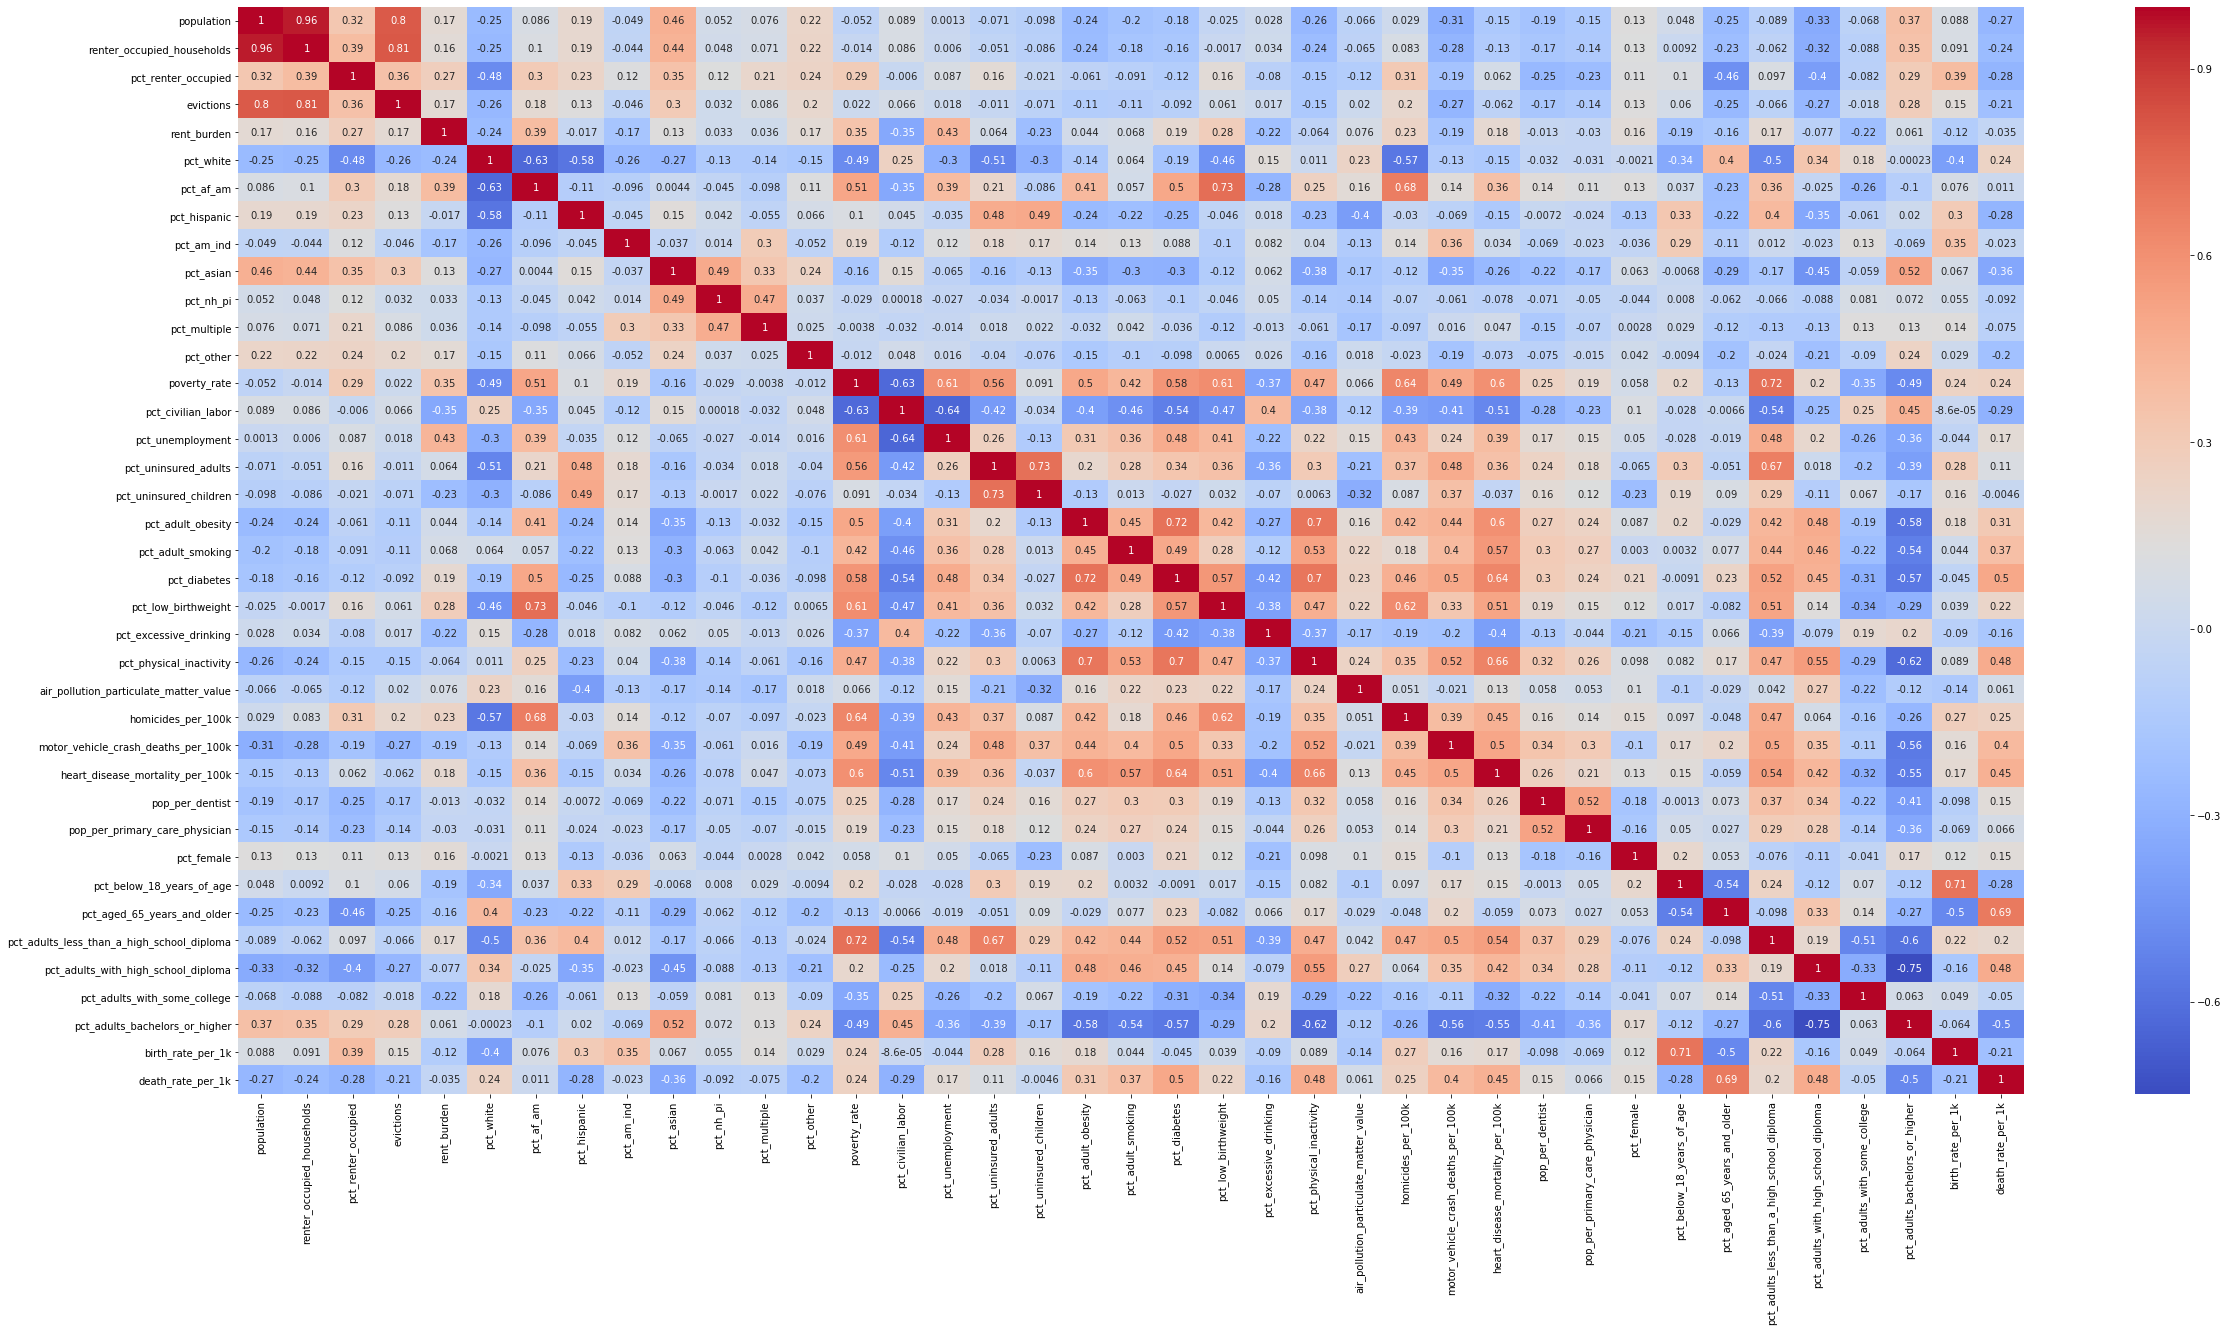

In [13]:
plt.figure(figsize=(40,20))
sns.heatmap(df_numeric.corr(method='pearson'),annot=True,cmap="coolwarm")
plt.show()

In [14]:
df_numeric.corr(method='kendall')

population  renter_occupied_households  pct_renter_occupied  evictions  rent_burden  pct_white  pct_af_am  pct_hispanic  pct_am_ind  pct_asian  pct_nh_pi  pct_multiple  pct_other  poverty_rate  pct_civilian_labor  pct_unemployment  pct_uninsured_adults  pct_uninsured_children  pct_adult_obesity  pct_adult_smoking  pct_diabetes  pct_low_birthweight  pct_excessive_drinking  pct_physical_inactivity  air_pollution_particulate_matter_value  homicides_per_100k  motor_vehicle_crash_deaths_per_100k  heart_disease_mortality_per_100k  pop_per_dentist  pop_per_primary_care_physician  pct_female  pct_below_18_years_of_age  pct_aged_65_years_and_older  pct_adults_less_than_a_high_school_diploma  pct_adults_with_high_school_diploma  pct_adults_with_some_college  pct_adults_bachelors_or_higher  birth_rate_per_1k  death_rate_per_1k
population                                    1.000000                    0.903586             0.250800   0.707281     0.284225  -0.173211   0.277305      0.176894   -0.010633   0.480097   0.271829      0.230095   0.414706     -0.033467            0.034091          0.080748             -0.124808               -0.233628          -0.109695          -0.120556     -0.118438            -0.043792               -0.051998                -0.216203                                0.051900           -0.279863                            -0.453044                         -0.064152        -0.291639                       -0.222755    0.187342                   0.102304                    -0.381784                                   -0.098348                            -0.230256                     -0.039931                        0.280878           0.091946          -0.303434
renter_occupied_households                    0.903586                    1.000000             0.332448   0.715237     0.301618  -0.197800   0.289294      0.187574   -0.002552   0.493891   0.278768      0.244805   0.418849     -0.002757            0.030162          0.085892             -0.104872               -0.233141          -0.106302          -0.117424     -0.115114            -0.025103               -0.056332                -0.208633                                0.043667           -0.230347                            -0.446774                         -0.048908        -0.322171                       -0.256910    0.210565                   0.092868                    -0.382729                                   -0.085343                            -0.249483                     -0.046999                        0.287988           0.115470          -0.285928
pct_renter_occupied                           0.250800                    0.332448             1.000000   0.287416     0.198065  -0.346253   0.222989      0.238261    0.068217   0.288368   0.195803      0.196586   0.222323      0.197570           -0.028246          0.041774              0.132830                0.004519          -0.024176          -0.053211     -0.066697             0.087842               -0.059822                -0.066876                               -0.073361            0.148777                            -0.149950                          0.043719        -0.240149                       -0.212408    0.140676                   0.105713                    -0.324065                                    0.073496                            -0.250870                     -0.040462                        0.150552           0.272357          -0.165336
evictions                                     0.707281                    0.715237             0.287416   1.000000     0.279490  -0.187927   0.312736      0.118568    0.006430   0.429788   0.217078      0.252638   0.383159      0.022170           -0.000957          0.110210             -0.110954               -0.222924          -0.023649          -0.048774     -0.046403             0.018192               -0.048752                -0.135425                                0.064602           -0.089493                            -0.385708                 

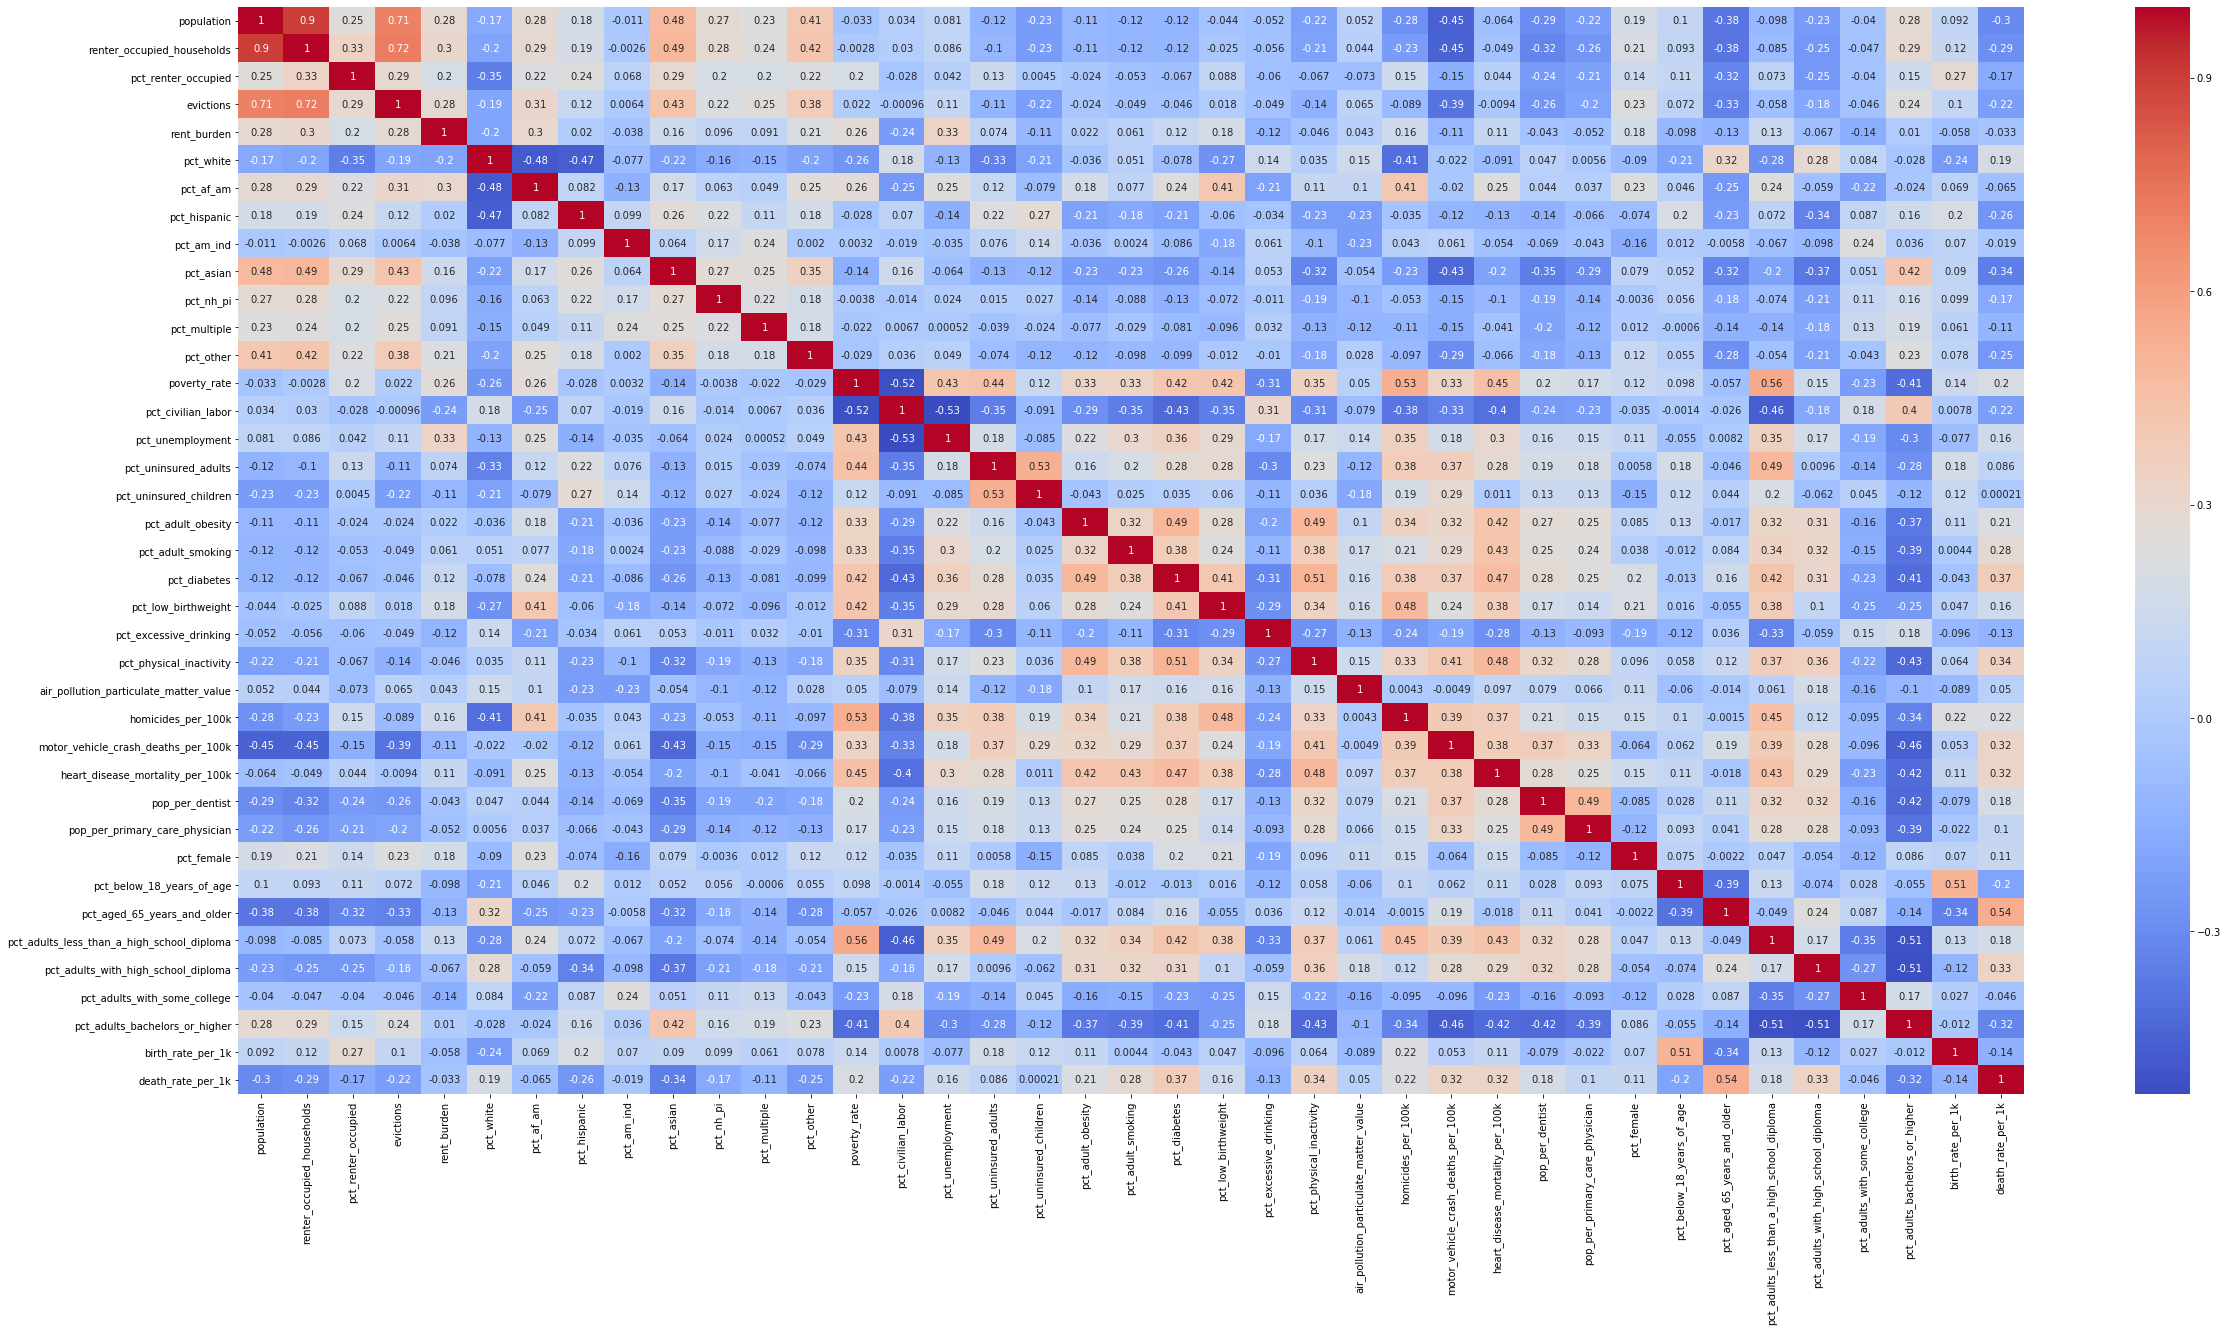

In [15]:
plt.figure(figsize=(40,20))
sns.heatmap(df_numeric.corr(method='kendall'),annot=True,cmap="coolwarm")
plt.show()

In [16]:
df_numeric.corr(method='spearman')

population  renter_occupied_households  pct_renter_occupied  evictions  rent_burden  pct_white  pct_af_am  pct_hispanic  pct_am_ind  pct_asian  pct_nh_pi  pct_multiple  pct_other  poverty_rate  pct_civilian_labor  pct_unemployment  pct_uninsured_adults  pct_uninsured_children  pct_adult_obesity  pct_adult_smoking  pct_diabetes  pct_low_birthweight  pct_excessive_drinking  pct_physical_inactivity  air_pollution_particulate_matter_value  homicides_per_100k  motor_vehicle_crash_deaths_per_100k  heart_disease_mortality_per_100k  pop_per_dentist  pop_per_primary_care_physician  pct_female  pct_below_18_years_of_age  pct_aged_65_years_and_older  pct_adults_less_than_a_high_school_diploma  pct_adults_with_high_school_diploma  pct_adults_with_some_college  pct_adults_bachelors_or_higher  birth_rate_per_1k  death_rate_per_1k
population                                    1.000000                    0.986379             0.361726   0.872461     0.408120  -0.246333   0.400202      0.249253   -0.016506   0.646628   0.375235      0.324662   0.559078     -0.042168            0.030120          0.133174             -0.185494               -0.339348          -0.164406          -0.165530     -0.176735            -0.064123               -0.088529                -0.324925                                0.076347           -0.381783                            -0.635936                         -0.089753        -0.417953                       -0.320824    0.274354                   0.149946                    -0.532854                                   -0.137726                            -0.335459                     -0.065560                        0.411431           0.134543          -0.422735
renter_occupied_households                    0.986379                    1.000000             0.472604   0.878195     0.431053  -0.281896   0.416743      0.265164   -0.005625   0.664300   0.383309      0.344481   0.565305      0.001402            0.025194          0.139265             -0.156652               -0.339359          -0.160551          -0.162489     -0.173792            -0.036704               -0.094785                -0.313741                                0.064184           -0.320970                            -0.630915                         -0.069333        -0.457814                       -0.366483    0.307656                   0.136404                    -0.535517                                   -0.120984                            -0.361627                     -0.075407                        0.422575           0.169166          -0.401411
pct_renter_occupied                           0.361726                    0.472604             1.000000   0.411881     0.287894  -0.499645   0.327216      0.349706    0.101491   0.412918   0.268477      0.289724   0.309399      0.289908           -0.043061          0.062783              0.199374                0.007078          -0.038923          -0.076892     -0.101581             0.126392               -0.092432                -0.103325                               -0.109282            0.218638                            -0.223595                          0.063245        -0.353148                       -0.311512    0.200127                   0.152891                    -0.458439                                    0.109433                            -0.367233                     -0.059868                        0.222574           0.393660          -0.242564
evictions                                     0.872461                    0.878195             0.411881   1.000000     0.397364  -0.266423   0.440199      0.164264    0.010249   0.593889   0.298586      0.359814   0.516060      0.035178           -0.014639          0.168470             -0.164555               -0.325688          -0.036096          -0.065557     -0.067683             0.022314               -0.078739                -0.202437                                0.093519           -0.121677                            -0.552329                 

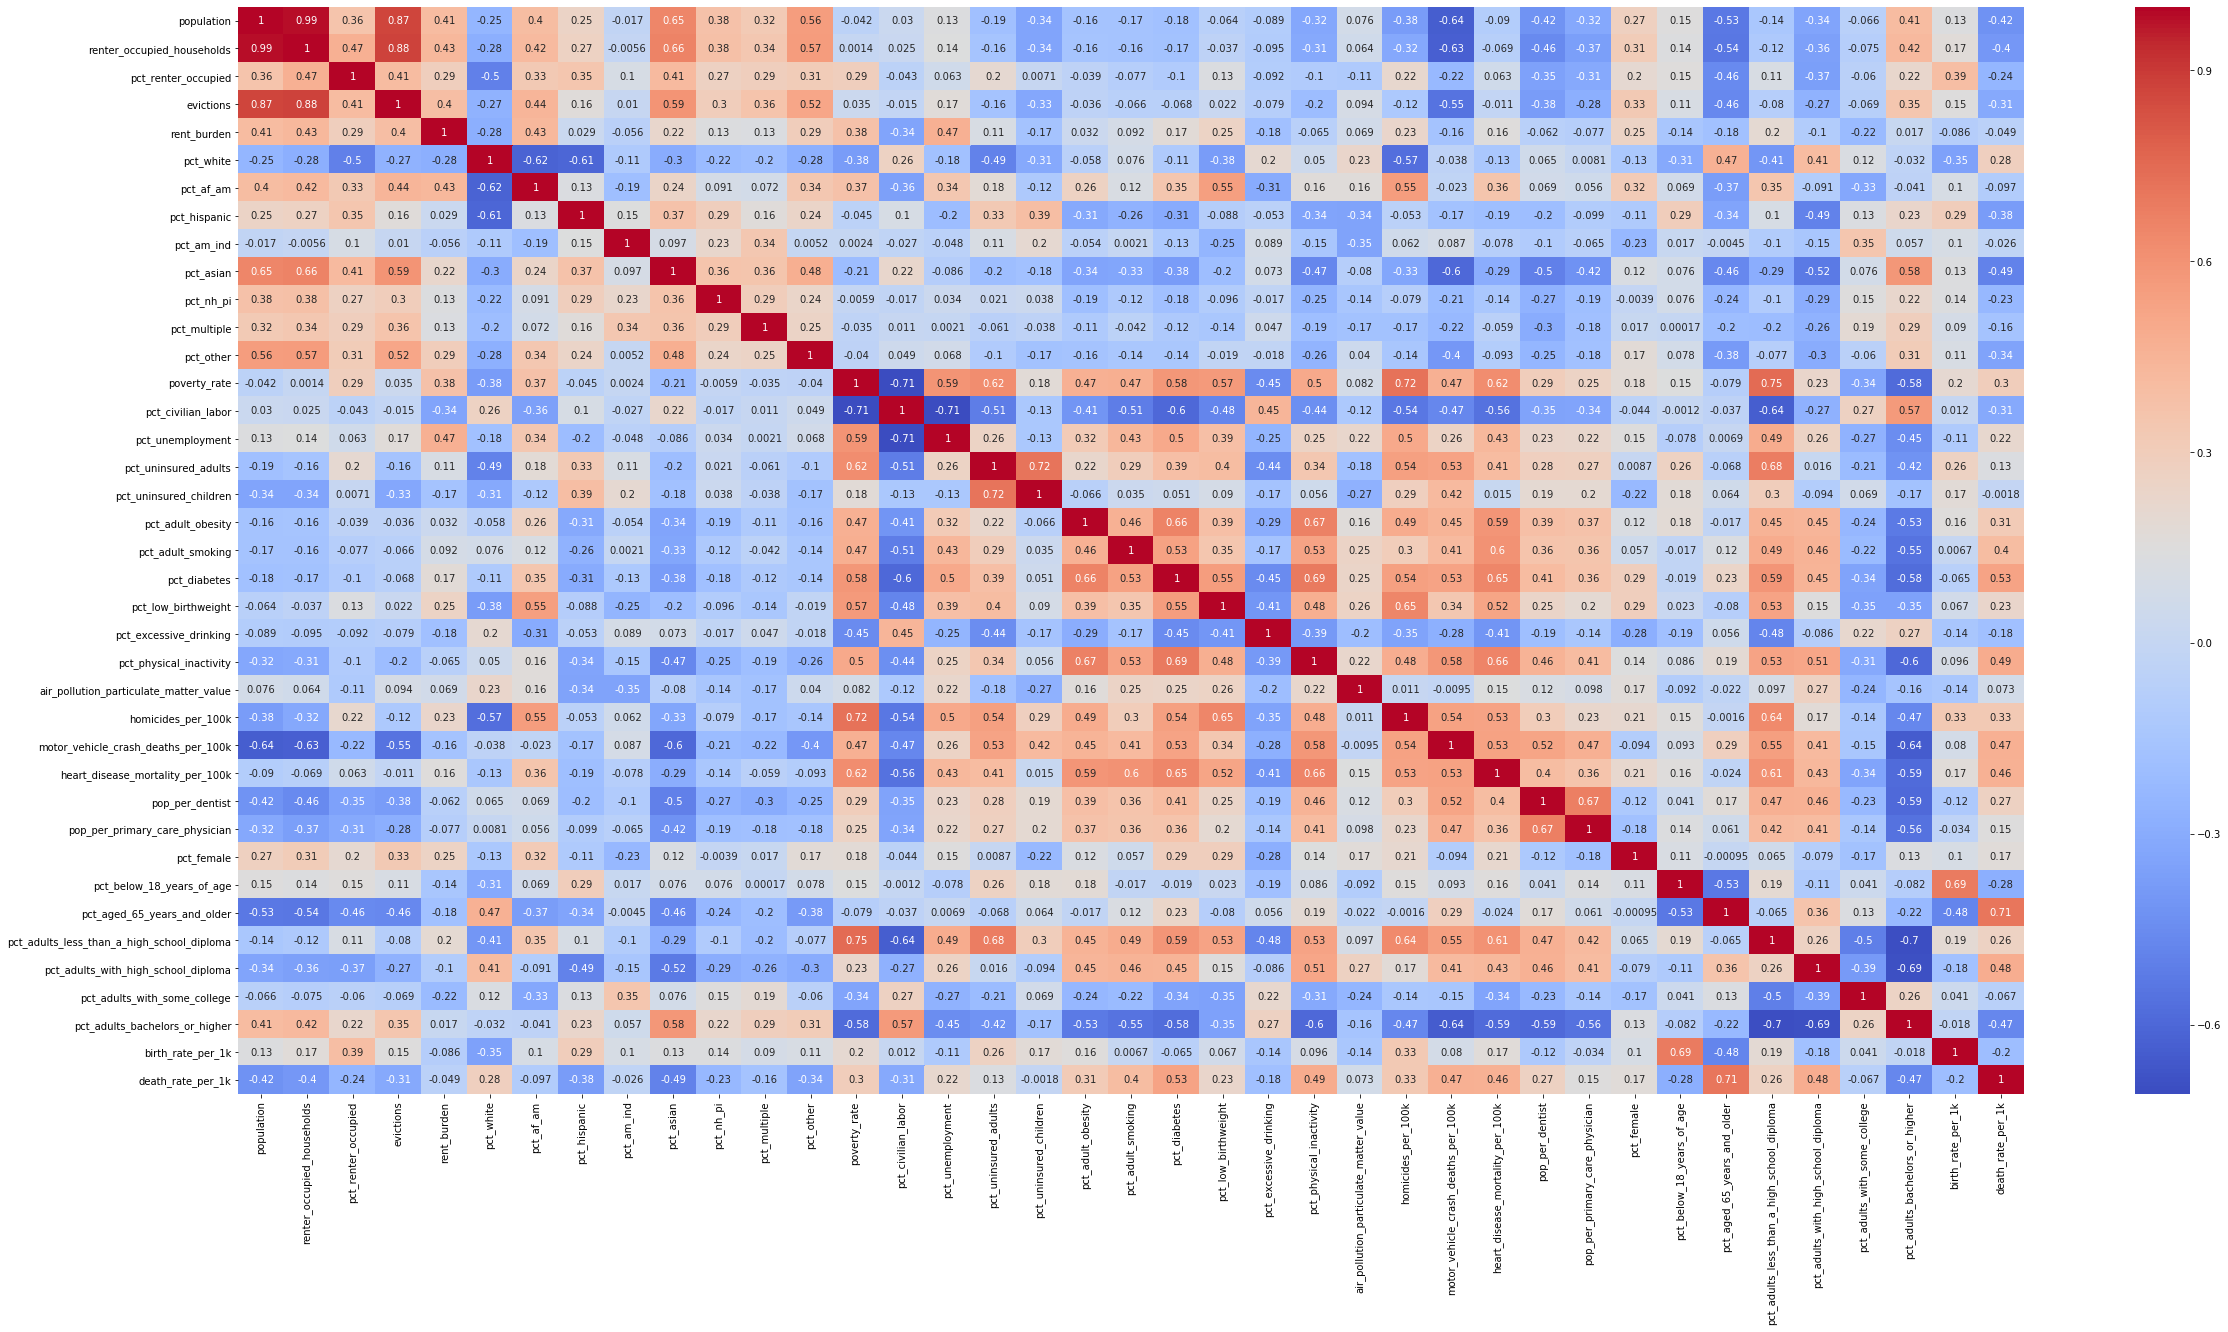

In [17]:
plt.figure(figsize=(40,20))
sns.heatmap(df_numeric.corr(method='spearman'),annot=True,cmap="coolwarm")
plt.show()

### Plot pairplot for several features vs gross rent

In [18]:
df_numeric_1 = df[['population','renter_occupied_households','pct_renter_occupied','evictions','rent_burden']]

In [19]:
df_numeric_1

population  renter_occupied_households  pct_renter_occupied  evictions  rent_burden
0        52842.0                      5403.0               26.840        NaN       27.960
1       212287.0                     53502.0               57.534     6032.0       33.072
2        81263.0                     13368.0               39.994     1012.0       32.044
3       122870.0                     19359.0               41.865        NaN       30.724
4       146153.0                     15766.0               30.681      644.0       30.860
5        12511.0                      1581.0               28.941        5.0       26.817
6         1334.0                       134.0               18.622        NaN       43.170
7        71635.0                      6210.0               23.387       15.0       17.856
8       823964.0                    117295.0               38.823     1841.0       31.199
9        11549.0                      1170.0               21.711       26.0       31.584
10       29002.0                      3571.0               30.476        NaN       26.524
11       27855.0                      2522.0               23.569      140.0       28.168
12         812.0                        96.0               36.232        0.0       18.535
13        4196.0                       385.0               18.924        NaN       21.502
14       20395.0                      2345.0               40.663        NaN       32.760
15       21993.0                      1882.0               18.323       18.0       23.409
16       41598.0                      4317.0               24.678       70.0       27.761
17       10318.0                       889.0               21.881        6.0       24.070
18        1822.0                       229.0               32.443        NaN       26.316
19       21551.0                      3047.0               26.296        NaN       30.690
20        1174.0                       150.0               33.510        0.0       21.996
21     1219257.0                    205037.0               44.571     5232.0       34.440
22        6009.0                       870.0               41.880        1.0       27.681
23      473493.0                     58843.0               35.775        NaN       30.826
24        8367.0                       998.0               29.427        NaN       30.523
25        9947.0                      1033.0               28.018       25.0       29.754
26        5917.0                       717.0               21.172        1.0       23.278
27       11568.0                      1909.0               36.729        NaN       23.797
28      507601.0                     50676.0               28.038     1208.0       28.058
29       11114.0                      1010.0               19.040       12.0       28.344
30       18472.0                      2314.0               32.743       -1.0       33.054
31       16580.0                      1574.0               22.061       26.0       29.059
32       79357.0                     15217.0               49.667       87.0       38.904
33       44590.0                      4469.0               23.687        NaN       32.644
34      170093.0                     21248.0               30.129      749.0       30.449
35      709682.0                     60133.0               25.824     1634.0       30.573
36        9418.0                       797.0               22.512        0.0       29.481
37       10709.0                       893.0               19.367        8.0       26.048
38       13014.0                      1177.0               23.290        4.0       27.759
39      505892.0                     70872.0               35.687     3726.0       28.283
40       56996.0                      3370.0               15.827       95.0       37.304
41        6728.0                       681.0               36.278        3.0       24.458
42      140997.0                     12937.0               18.834      155.0       33.648
43        8950.0                       829.0  

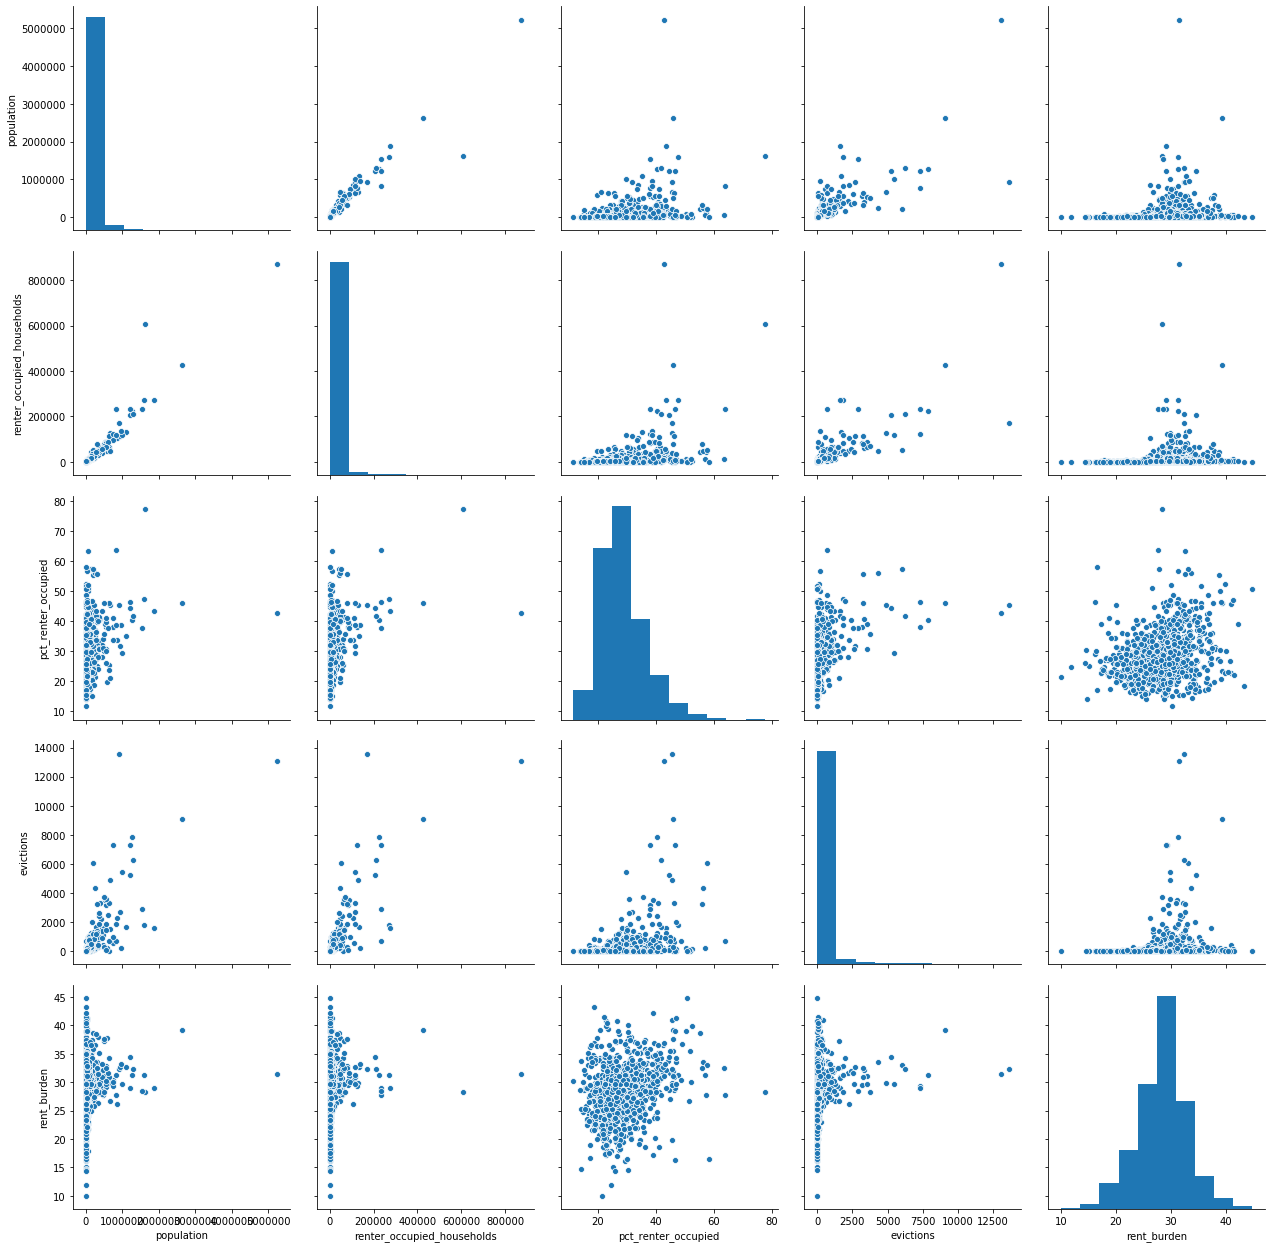

In [20]:
sns.pairplot(df_numeric_1.sample(1000),height=3.5)
plt.show()

In [21]:
df_numeric_2 = df[['pct_white','pct_af_am','pct_hispanic','pct_am_ind','pct_asian']]

In [22]:
df_numeric_2

pct_white  pct_af_am  pct_hispanic  pct_am_ind  pct_asian
0      0.924234   0.025049      0.034351    0.001978   0.002308
1      0.398318   0.484635      0.063760    0.001394   0.021801
2      0.483789   0.381916      0.099035    0.002509   0.009255
3      0.468043   0.088393      0.368847    0.003210   0.046383
4      0.651511   0.251317      0.047687    0.005197   0.016952
5      0.950060   0.009855      0.024900    0.003894   0.003292
6      0.982142   0.000000      0.002975    0.004457   0.000000
7      0.193538   0.005986      0.062671    0.715985   0.004314
8      0.688774   0.064849      0.099817    0.009653   0.059371
9      0.960233   0.007181      0.017661    0.000000   0.000302
10     0.662233   0.002481      0.039896    0.233455   0.003587
11     0.627385   0.326490      0.028042    0.001414   0.004523
12     0.891586   0.000000      0.068693    0.000000   0.013642
13     0.832080   0.000996      0.027344    0.098304   0.013224
14     0.571231   0.410184      0.011690    0.000905   0.001482
15     0.976156   0.005355      0.009129    0.002124   0.003321
16     0.958092   0.003427      0.015015    0.003856   0.005494
17     0.974037   0.002877      0.002282    0.004355   0.006260
18     0.955635   0.000000      0.019690    0.004403   0.000000
19     0.550852   0.439452      0.001201    0.000000   0.004903
20     0.660507   0.000000      0.339493    0.000000   0.000000
21     0.435520   0.200215      0.285560    0.001394   0.050986
22     0.848106   0.014592      0.120447    0.001810   0.000000
23     0.519820   0.030052      0.387368    0.004600   0.036707
24     0.855743   0.121459      0.011140    0.003949   0.001194
25     0.632258   0.329700      0.001196    0.005440   0.000000
26     0.651964   0.001296      0.270820    0.036848   0.008008
27     0.854519   0.001005      0.022376    0.096121   0.005783
28     0.690852   0.034314      0.221434    0.003186   0.024836
29     0.861817   0.023414      0.081322    0.007184   0.005370
30     0.938728   0.021107      0.020957    0.002580   0.001000
31     0.954618   0.002927      0.017317    0.003976   0.001413
32     0.778143   0.035779      0.043184    0.043664   0.041675
33     0.907312   0.051608      0.020818    0.002197   0.002983
34     0.669239   0.184872      0.114424    0.001780   0.011566
35     0.637642   0.067035      0.207269    0.000890   0.066665
36     0.576332   0.374548      0.025661    0.001106   0.000100
37     0.960698   0.007556      0.021235    0.001120   0.001523
38     0.949369   0.002754      0.027523    0.000905   0.004107
39     0.691830   0.089940      0.135749    0.006921   0.042404
40     0.817334   0.055102      0.098910    0.001694   0.011926
41     0.668716   0.047792      0.229032    0.034726   0.001584
42     0.889366   0.027484      0.050281    0.003470   0.015846
43     0.612108   0.286956      0.062681    0.002802   0.021844
44     0.565186   0.032283      0.268578    0.010087   0.071490
45     0.829722   0.004336      0.041533    0.090604   0.005571
46     0.965505   0.000000      0.025332    0.007441   0.001722
47     0.911049   0.006559      0.053356    0.002689   0.011799
48     0.376951   0.483999      0.099612    0.001092   0.019724
49     0.564418   0.358180      0.061083    0.000000   0.000000
50     0.934216   0.003066      0.025080    0.014831   0.005129
51     0.755241   0.140830      0.045365    0.001494   0.026890
52     0.641231   0.082256      0.052981    0.136235   0.001008
53     0.949343   0.007483      0.015420    0.006616   0.005153
54     0.378314   0.503589      0.038036    0.044784   0.002899
55     0.727791   0.053196      0.167242    0.002317   0.023463
56     0.942830   0.023146      0.010466    0.000805   0.008403
57     0.136839   0.003235      0.857729    0.000000   0.002197
58     0.540487   0.026395      0.409178    0.012198   0.002098
59     0.349473   0.617257      0.016906    0.005609   0.004515
60     0.785913   0.001095      0.180277    0.003195   0.008141
61     0.682381   0.014961      0.2616

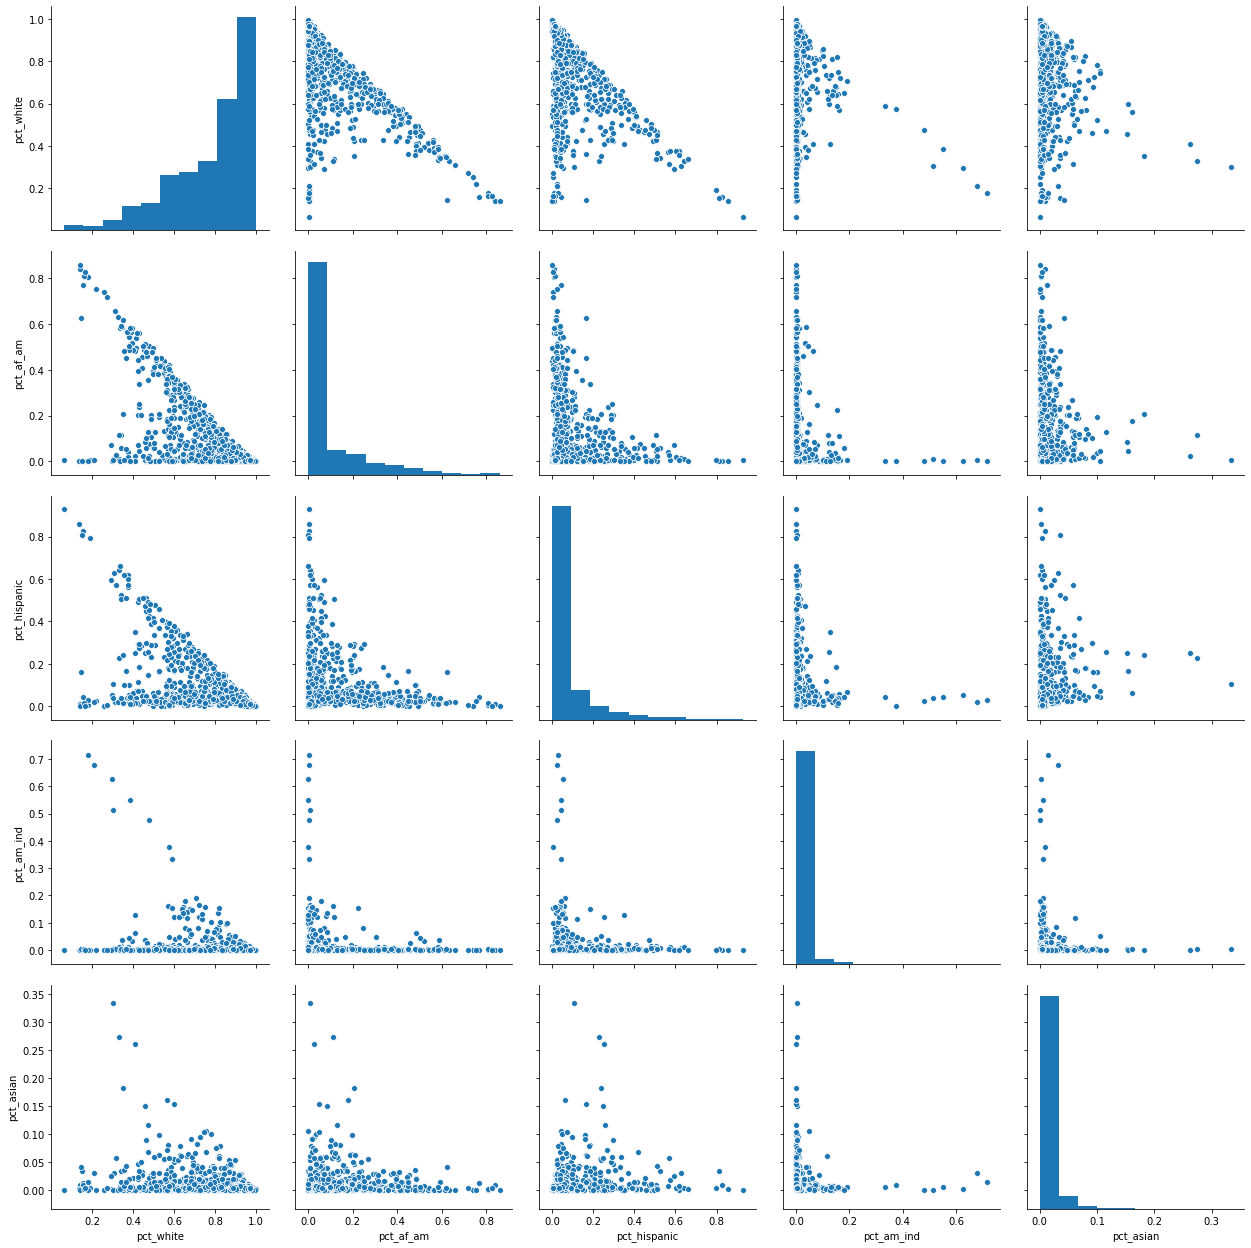

In [23]:
sns.pairplot(df_numeric_2.sample(1000),height=3.5)
plt.show()

In [24]:
df_numeric_3 = df[['pct_nh_pi','pct_multiple','pct_other','poverty_rate','pct_civilian_labor']]

In [25]:
df_numeric_3.head()

pct_nh_pi  pct_multiple  pct_other  poverty_rate  pct_civilian_labor
0   0.000000      0.012080   0.000000        11.469               0.436
1   0.000199      0.028500   0.001394        19.170               0.524
2   0.000800      0.018710   0.003988        17.408               0.464
3   0.002206      0.021934   0.000984        18.560               0.468
4   0.000900      0.025737   0.000700        10.460               0.470

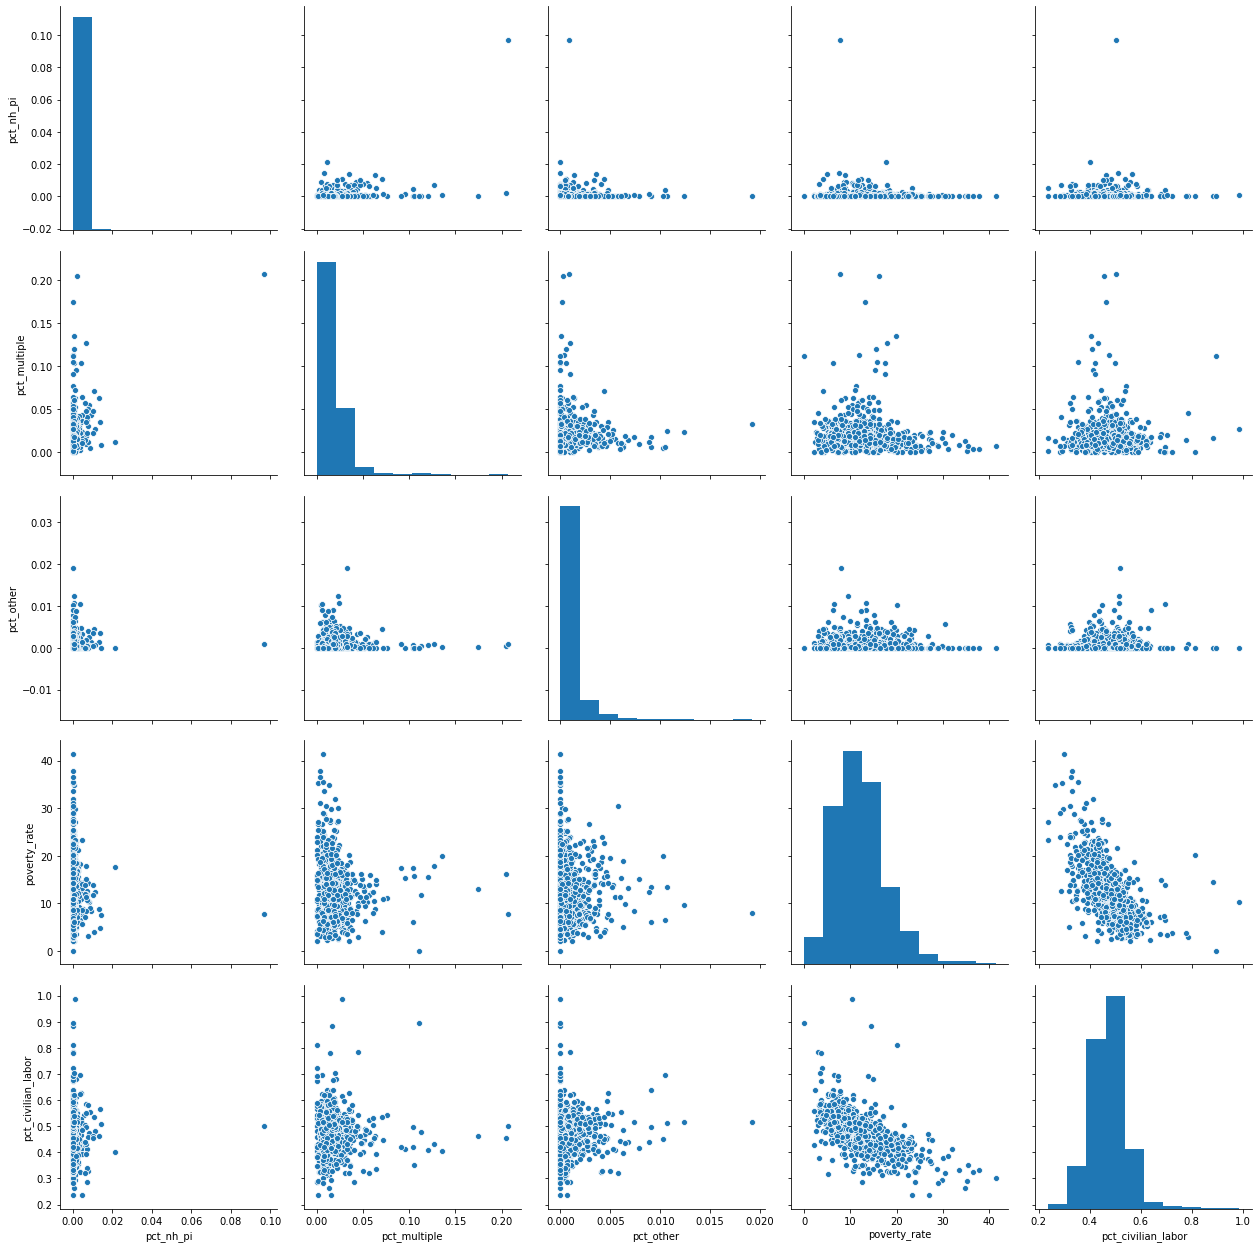

In [26]:
sns.pairplot(df_numeric_3.sample(1000),height=3.5)
plt.show()

In [27]:
df_numeric_4 = df[['pct_unemployment','pct_uninsured_adults','pct_uninsured_children','pct_adult_obesity','pct_adult_smoking']]

In [28]:
df_numeric_4.head()

pct_unemployment  pct_uninsured_adults  pct_uninsured_children  pct_adult_obesity  pct_adult_smoking
0             0.075                 0.218                   0.057              0.284              0.257
1             0.062                 0.225                   0.058              0.282              0.187
2             0.094                 0.250                   0.081              0.349              0.121
3             0.040                 0.368                   0.148              0.339              0.226
4             0.058                 0.211                   0.084              0.290              0.191

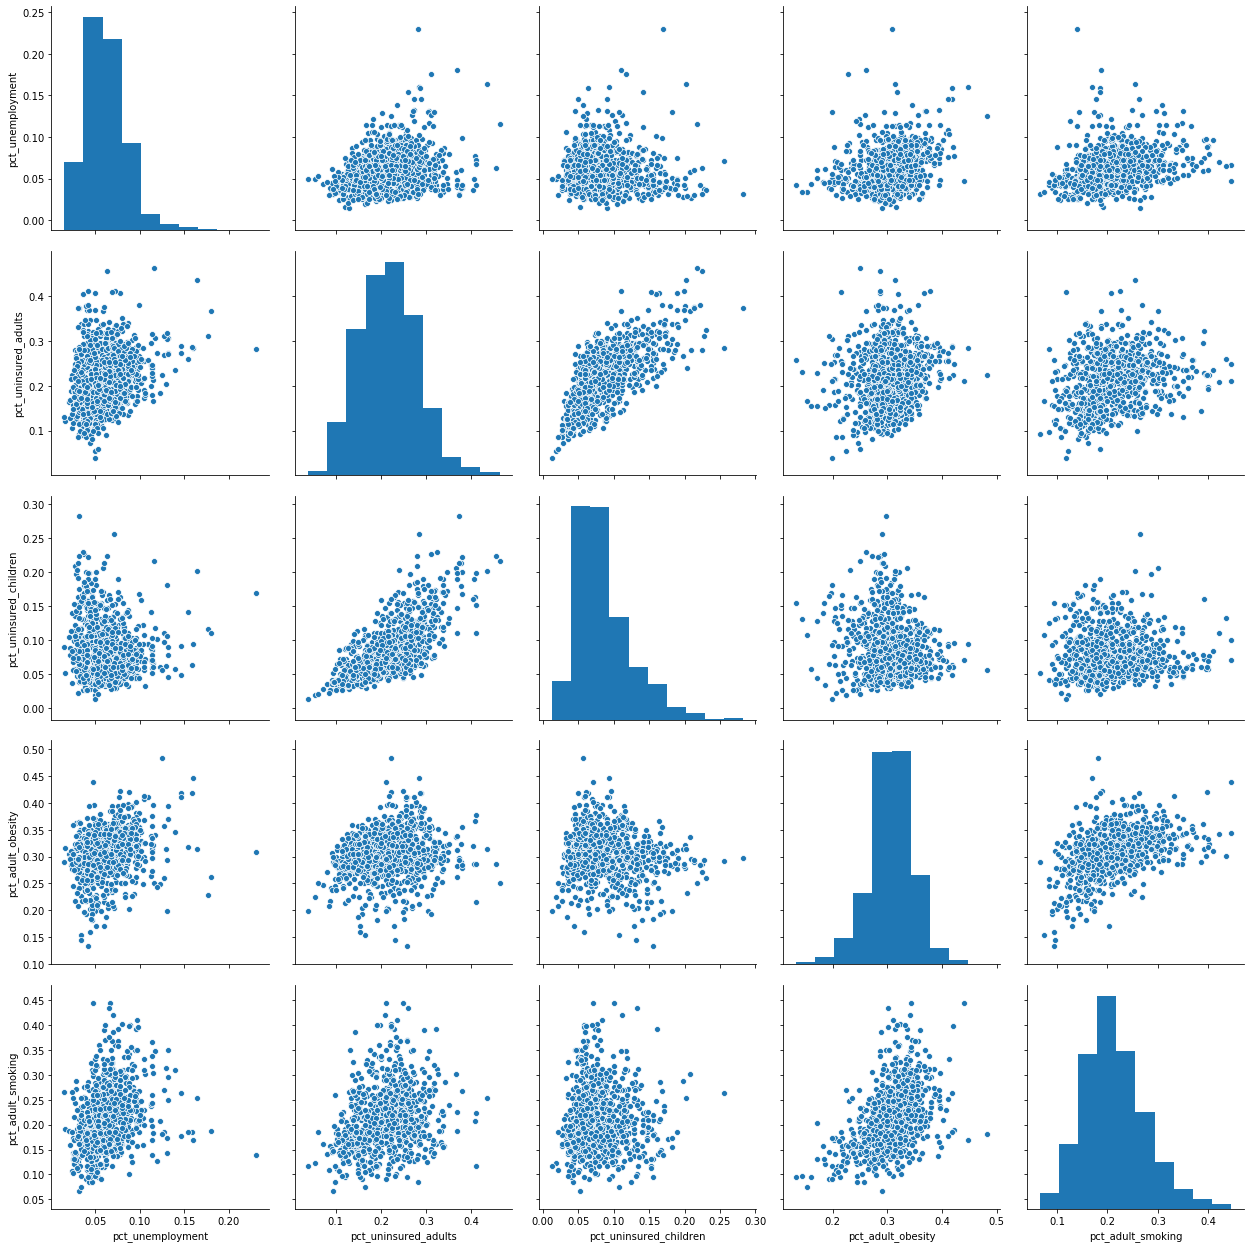

In [29]:
sns.pairplot(df_numeric_4.sample(1000),height=3.5)
plt.show()

In [30]:
df_numeric_5 = df[['pct_diabetes','pct_low_birthweight','pct_excessive_drinking','pct_physical_inactivity','air_pollution_particulate_matter_value']]

In [31]:
df_numeric_5.head()

pct_diabetes  pct_low_birthweight  pct_excessive_drinking  pct_physical_inactivity  air_pollution_particulate_matter_value
0         0.114                0.080                   0.048                    0.332                               13.194028
1         0.097                0.120                   0.164                    0.252                               12.419433
2         0.137                0.099                     NaN                    0.308                               11.877446
3         0.100                0.099                   0.150                    0.320                                9.826327
4         0.104                0.090                   0.153                    0.246                               12.530045

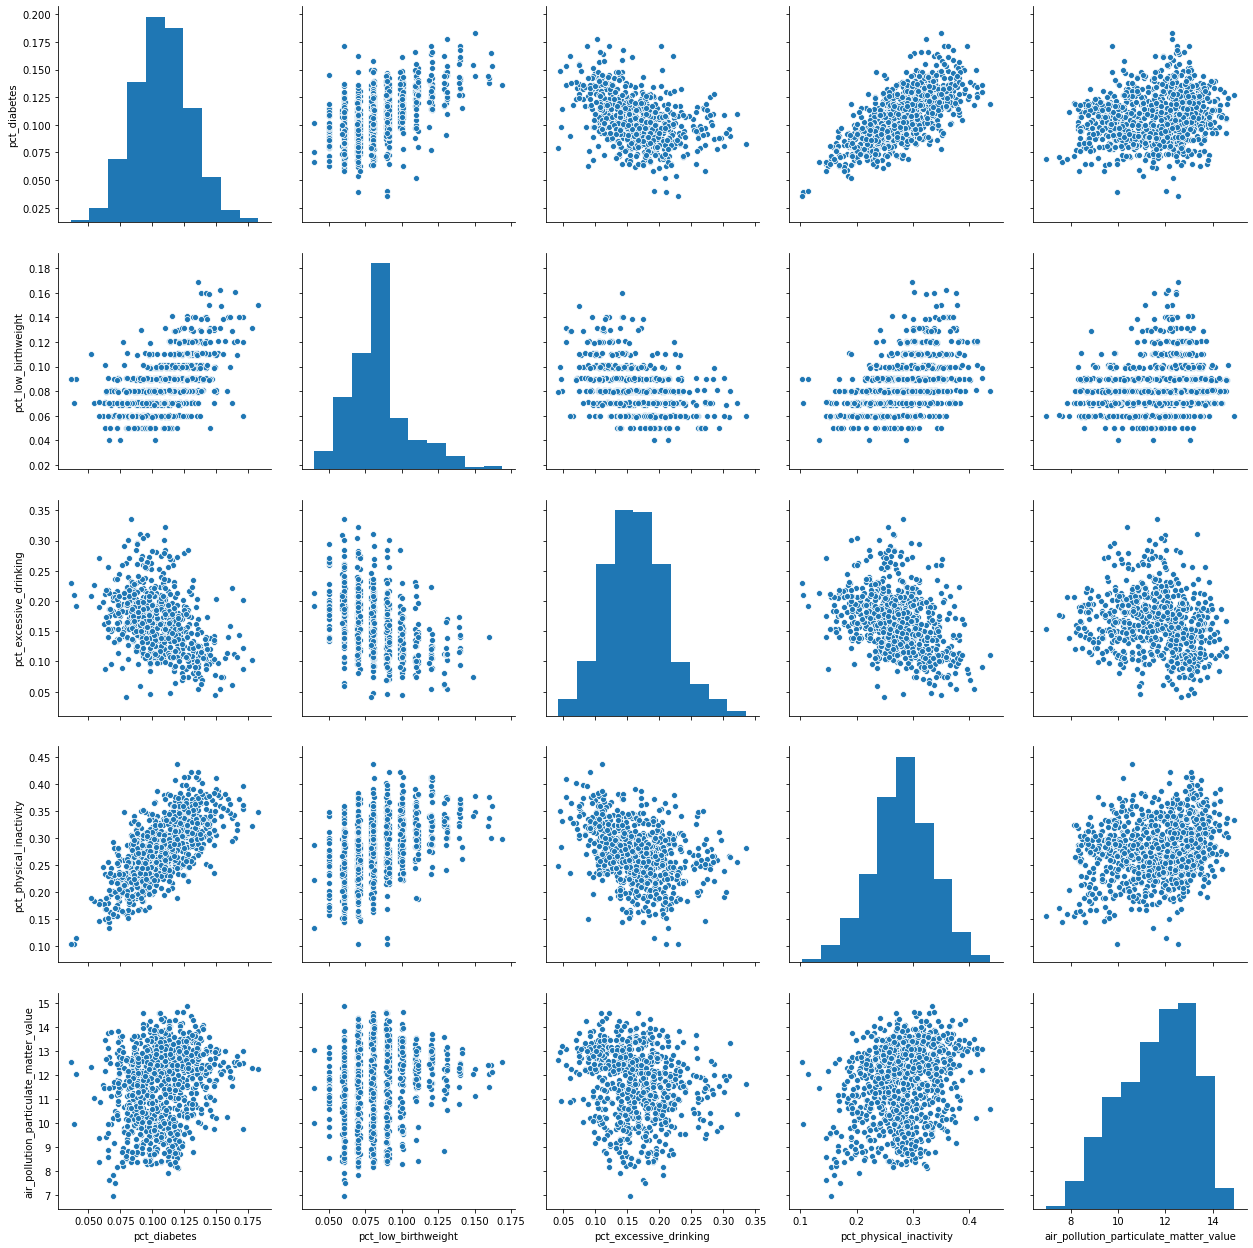

In [32]:
sns.pairplot(df_numeric_5.sample(1000),height=3.5)
plt.show()

In [33]:
df_numeric_6 = df[['homicides_per_100k','motor_vehicle_crash_deaths_per_100k','heart_disease_mortality_per_100k','pop_per_dentist','pop_per_primary_care_physician']]

In [34]:
df_numeric_6.head()

homicides_per_100k  motor_vehicle_crash_deaths_per_100k  heart_disease_mortality_per_100k  pop_per_dentist  pop_per_primary_care_physician
0                3.31                                19.83                               293           4880.0                          2710.0
1               26.93                                10.83                               308            850.0                          1009.0
2               10.26                                23.25                               269           2980.0                          2459.0
3                8.25                                21.27                               340           2259.0                          1240.0
4                5.30                                16.52                               263           1919.0                          2509.0

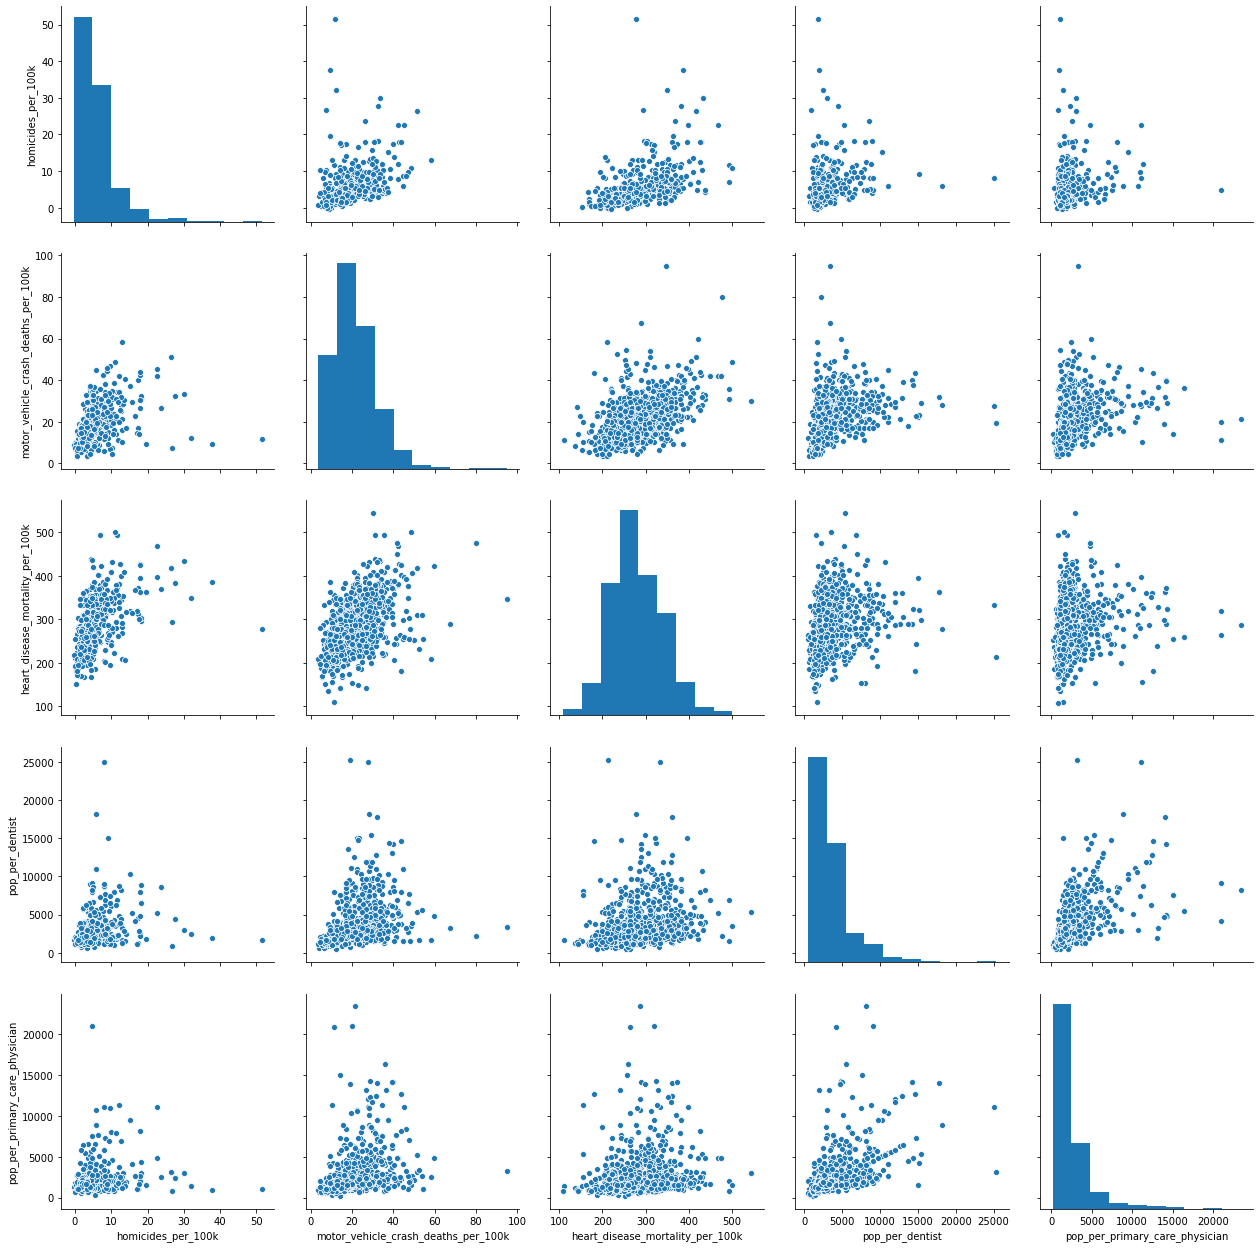

In [35]:
sns.pairplot(df_numeric_6.sample(1000),height=3.5)
plt.show()

In [36]:
df_numeric_7 = df[['pct_female','pct_below_18_years_of_age','pct_aged_65_years_and_older','pct_adults_less_than_a_high_school_diploma','pct_adults_with_high_school_diploma']]

In [37]:
df_numeric_7.head()

pct_female  pct_below_18_years_of_age  pct_aged_65_years_and_older  pct_adults_less_than_a_high_school_diploma  pct_adults_with_high_school_diploma
0       0.512                      0.215                        0.177                                    0.174651                             0.395210
1       0.522                      0.192                        0.113                                    0.168327                             0.230080
2       0.526                      0.240                        0.153                                    0.201816                             0.329970
3       0.491                      0.282                        0.111                                    0.239563                             0.277336
4       0.516                      0.259                        0.108                                    0.100100                             0.289289

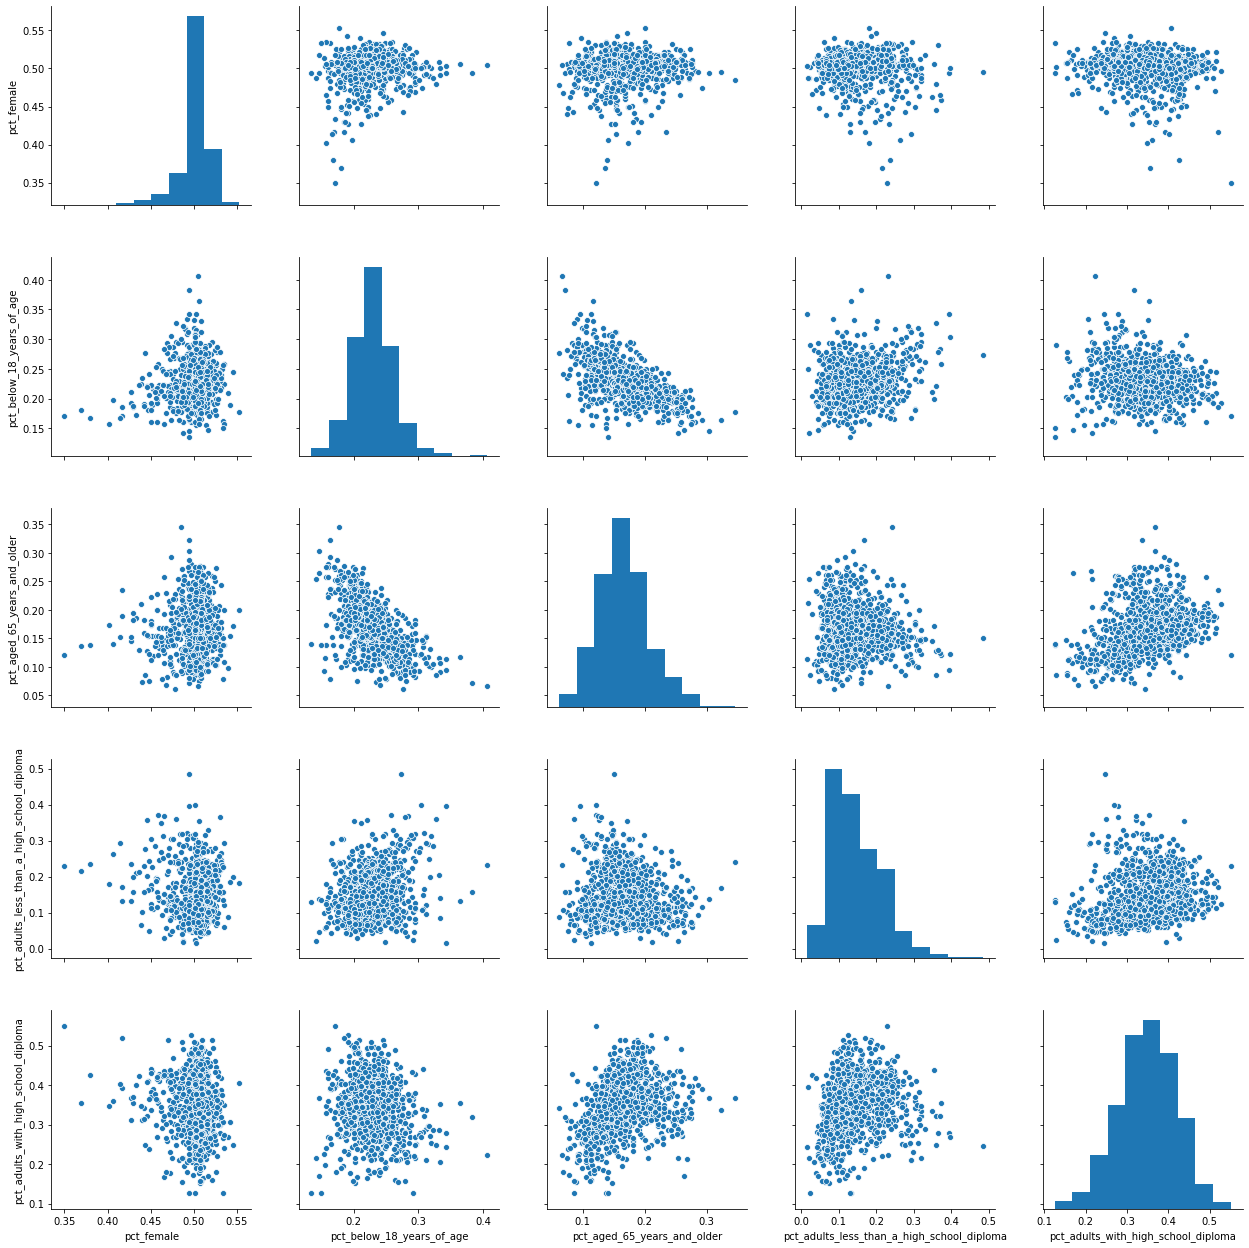

In [38]:
sns.pairplot(df_numeric_7.sample(1000),height=3.5)
plt.show()

In [39]:
df_numeric_8 = df[['pct_adults_with_some_college','pct_adults_bachelors_or_higher','birth_rate_per_1k','death_rate_per_1k']]

In [40]:
df_numeric_8.head()

pct_adults_with_some_college  pct_adults_bachelors_or_higher  birth_rate_per_1k  death_rate_per_1k
0                      0.274451                        0.155689           9.828291          10.628268
1                      0.241036                        0.360558          13.285546           8.818293
2                      0.287588                        0.180626          11.571830          10.136089
3                      0.333996                        0.149105          17.191860          10.089273
4                      0.360360                        0.250250          12.463880           6.432751

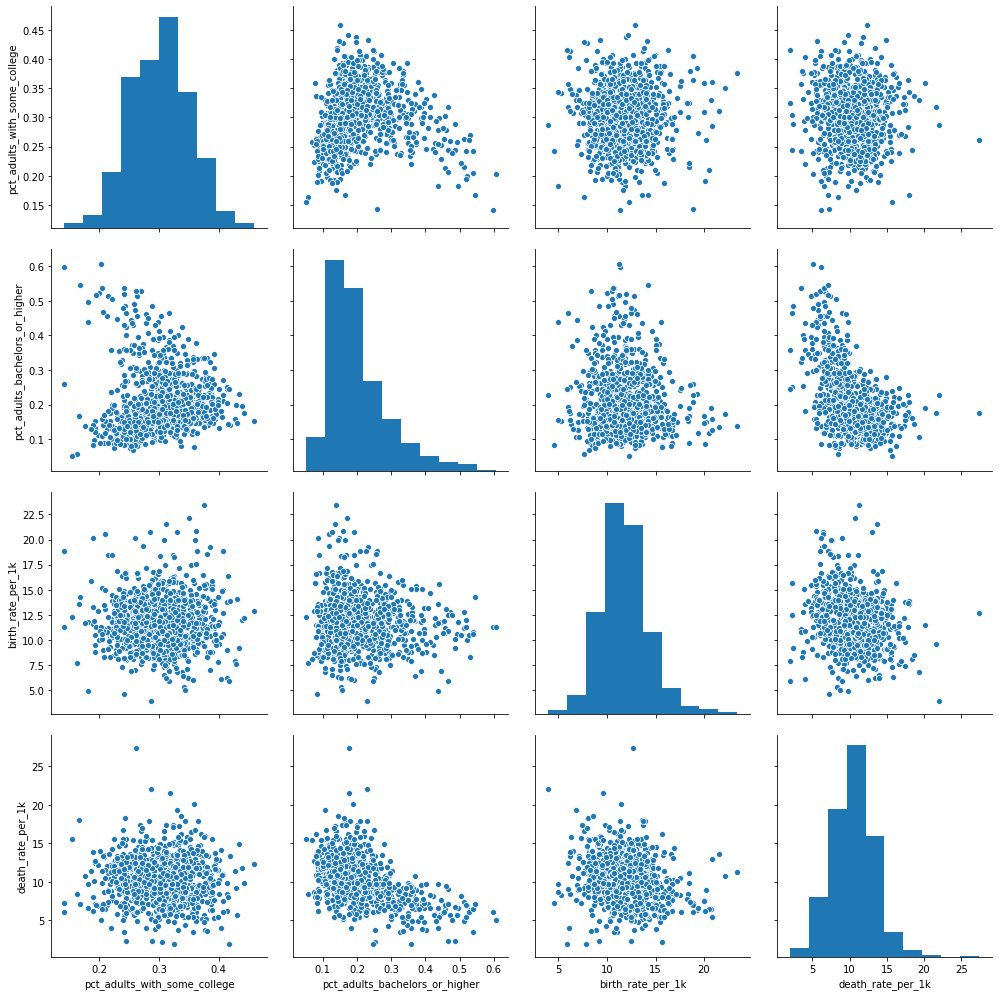

In [41]:
sns.pairplot(df_numeric_8.sample(1000),height=3.5)
plt.show()

### Analyse the categorical features

In [42]:
df_cat = df[['county_code','state','rucc','urban_influence','economic_typology']]

In [43]:
df_cat.head()

county_code    state                                               rucc                                    urban_influence                   economic_typology
0     8e7613e  9d1e27d  Metro - Counties in metro areas of fewer than ...  Small-in a metro area with fewer than 1 millio...                      Nonspecialized
1     694a5e8  a952566  Metro - Counties in metro areas of 1 million p...  Large-in a metro area with at least 1 million ...  Federal/State government-dependent
2     b3f0726  20d32fc  Nonmetro - Urban population of 20,000 or more,...        Micropolitan adjacent to a large metro area             Manufacturing-dependent
3     fd922f0  1b0d913  Metro - Counties in metro areas of 250,000 to ...  Small-in a metro area with fewer than 1 millio...                      Nonspecialized
4     3bd551e  698ab34  Metro - Counties in metro areas of 250,000 to ...  Small-in a metro area with fewer than 1 millio...                      Nonspecialized

In [44]:
df['county_code'].value_counts()

f748fbc    1
8b9fdac    1
688749a    1
9ab9800    1
83eda7a    1
674a610    1
f4d2318    1
56cf1f8    1
1d4c586    1
d4b35b2    1
75ac402    1
3583184    1
6de96b6    1
3b89906    1
c8d7472    1
62bc4fa    1
2cd9ce8    1
cf56cbe    1
180d9fe    1
3be3024    1
4f4d4ea    1
e91cba2    1
1e993a6    1
4259e54    1
1472ba2    1
481d462    1
ca2a32c    1
78d6b02    1
1812730    1
a824a5e    1
94a04c8    1
c5cd86c    1
934bcf2    1
fae576a    1
5ae4a04    1
dd5d09e    1
1d5aa50    1
3f64980    1
a4249e0    1
dfdfb10    1
21dc198    1
3bd68ca    1
b6688b2    1
b2281ca    1
f3cce4a    1
c46ff6a    1
895bf28    1
425b656    1
7115cf0    1
139ba5a    1
a1024a0    1
06d2d6e    1
930b3ca    1
8c661f4    1
04ae71c    1
a877608    1
3d5a66e    1
aac620e    1
1dafe84    1
f89b4d4    1
68444f8    1
578ae50    1
016b15c    1
623c3c6    1
e21294a    1
cc9e56c    1
e1e70aa    1
810ce74    1
bb3bbe2    1
30e18e4    1
6e083b8    1
e7e6f0c    1
dde31f4    1
8b6c2fe    1
7d6360c    1
aee210a    1
34011f4    1

In [45]:
df['county_code'].nunique()

1576

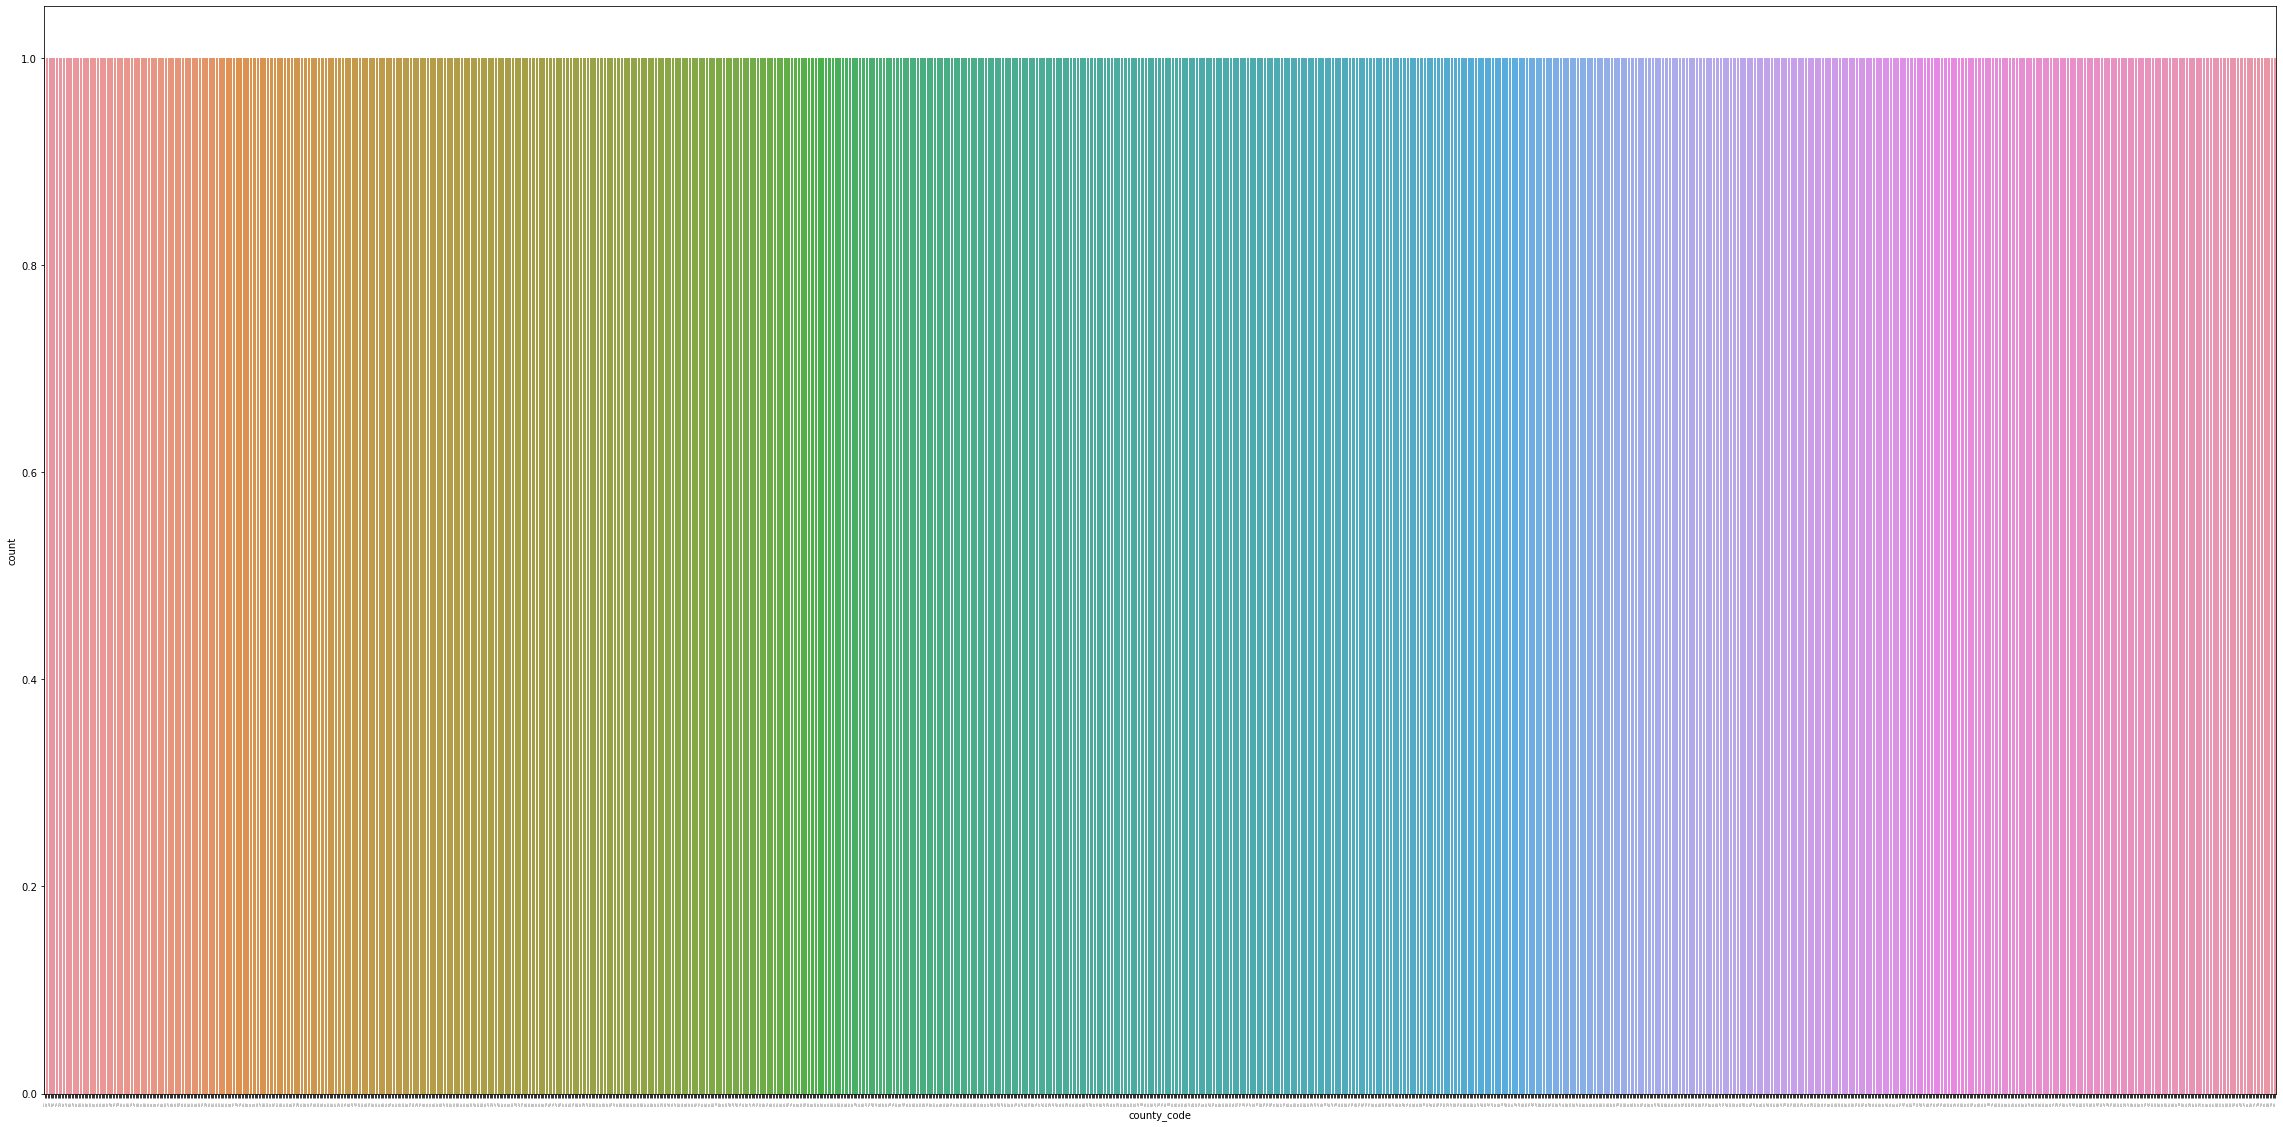

In [46]:
plt.figure(figsize=(40,20))
sns.countplot(x='county_code',data=df_cat)
plt.tick_params(axis='x',which='major',labelsize=1)
plt.xticks(rotation=90)
plt.show()

In [47]:
df['state'].value_counts()

1b0d913    123
4522abc     66
a952566     64
528ea9f     63
08f8fb4     61
e2f94fa     55
dc9ae72     55
158df01     50
9d1e27d     48
9dda412     48
b795815     48
c479f0c     46
52acab4     46
09d8cd0     45
20d32fc     44
9d0874a     43
9e0007d     42
1646cf6     40
485e9af     39
0f8930b     39
e74aca3     36
e899d7f     36
5086a32     34
78e8330     32
4c72956     27
1dcfd4e     27
7572db1     27
698ab34     25
fb8cab1     23
8036085     21
c3dbf0a     21
3745933     20
176f5f0     20
842bd12     18
b44cfe6     18
5029ed4     15
64ffe5d     14
bc77872     14
4cd9667     13
6d287d7     11
fa605d5     10
7dd3518     10
2b7da97      8
dfc21f3      8
375d4d3      8
d233cec      6
914c15f      3
3337bbb      2
9e065a4      2
a0e0eec      1
105e445      1
Name: state, dtype: int64

In [48]:
df['state'].nunique()

51

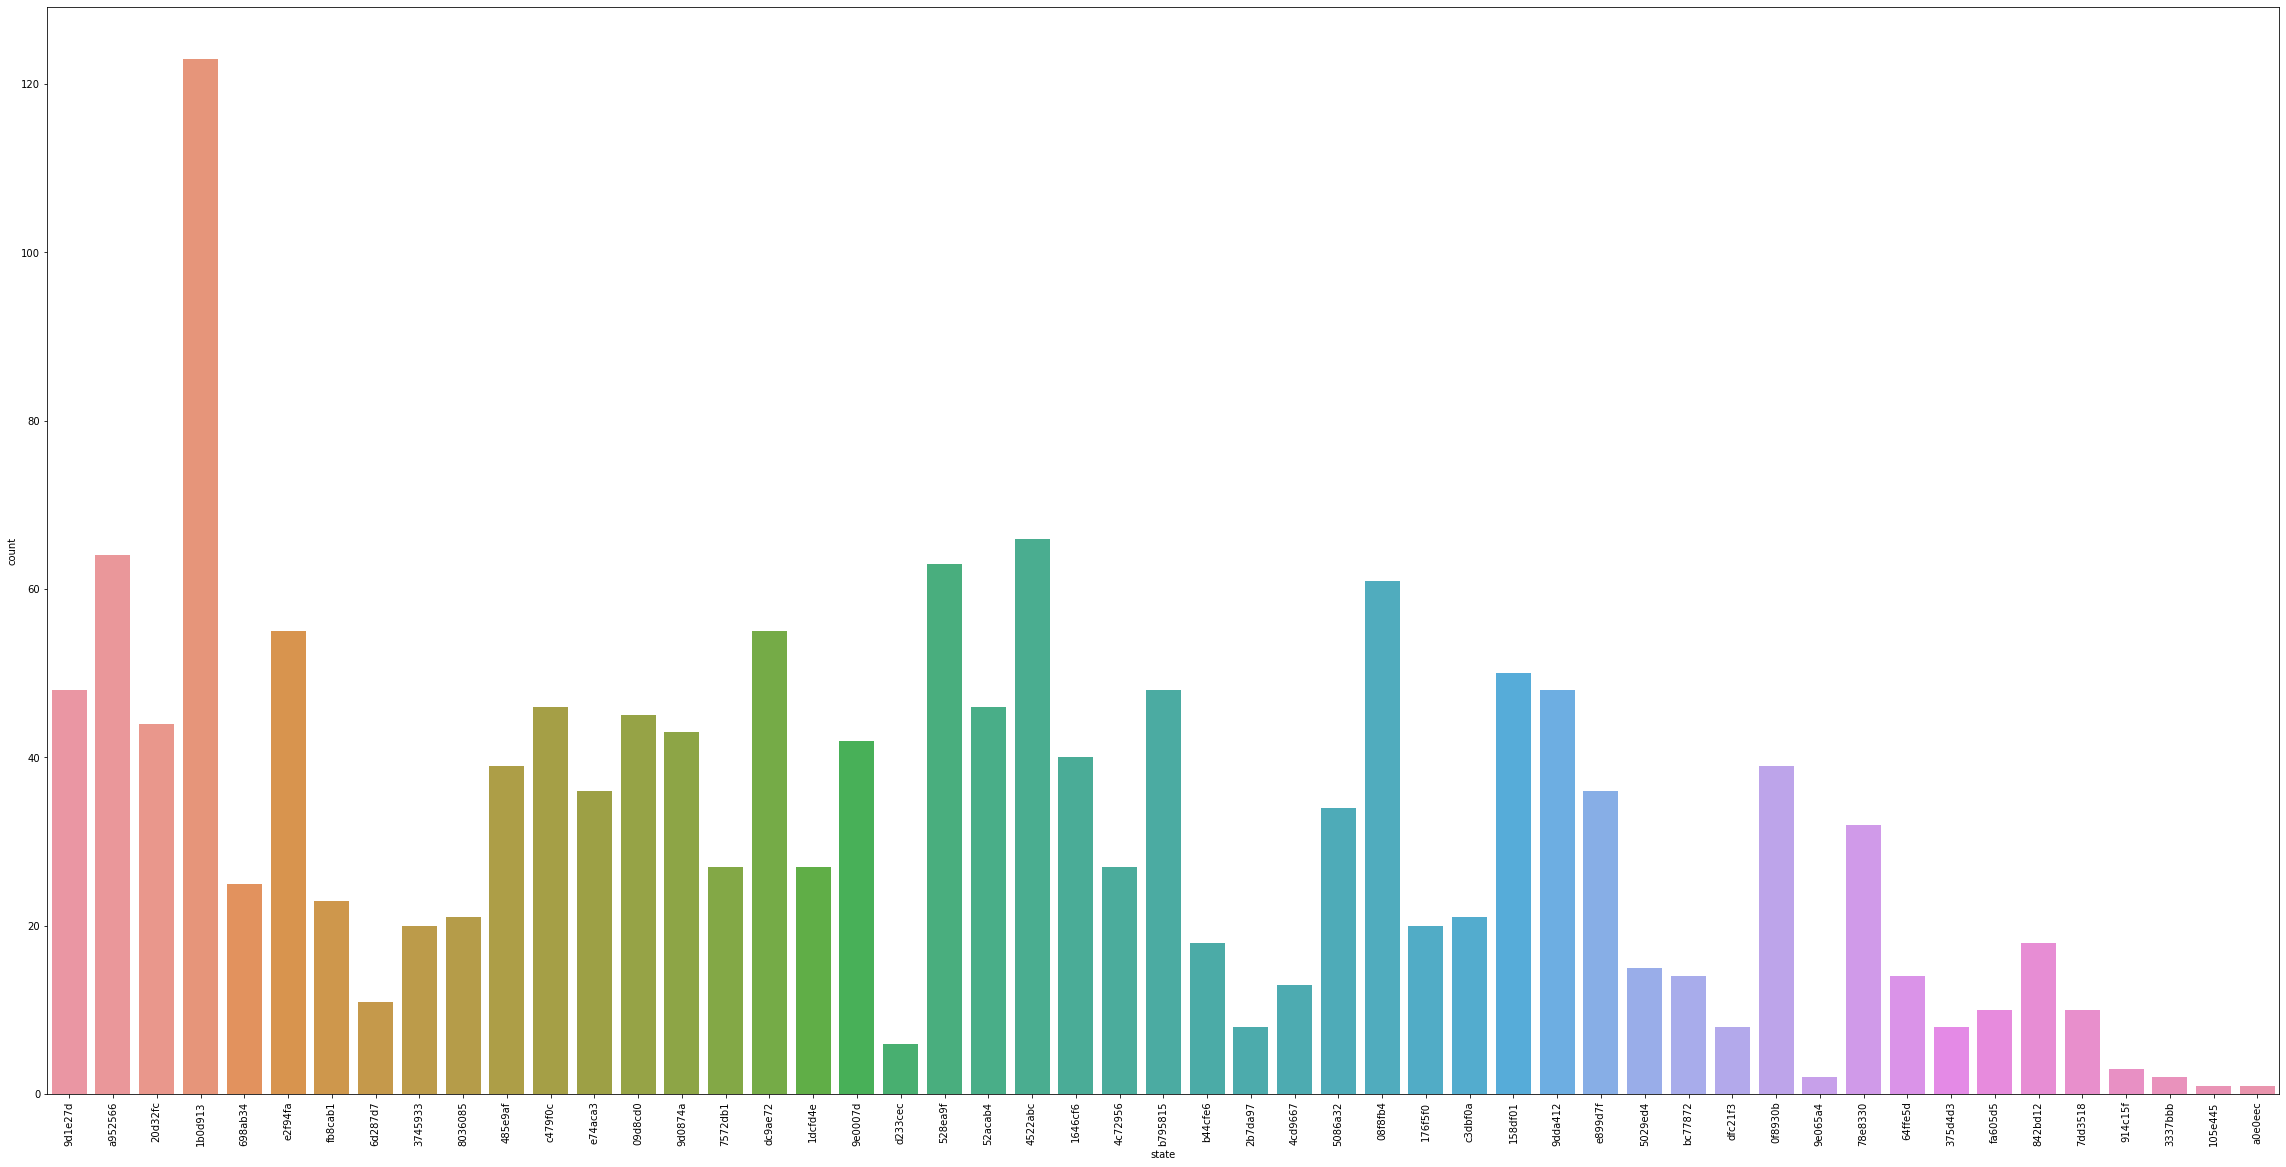

In [49]:
plt.figure(figsize=(40,20))
sns.countplot(x='state',data=df_cat)
plt.xticks(rotation=90)
plt.show()

In [50]:
df['rucc'].value_counts()

Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area                         291
Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area                     227
Metro - Counties in metro areas of 1 million population or more                                  213
Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area    208
Metro - Counties in metro areas of fewer than 250,000 population                                 190
Metro - Counties in metro areas of 250,000 to 1 million population                               184
Nonmetro - Urban population of 20,000 or more, adjacent to a metro area                          113
Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area        100
Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area                       50
Name: rucc, dtype: int64

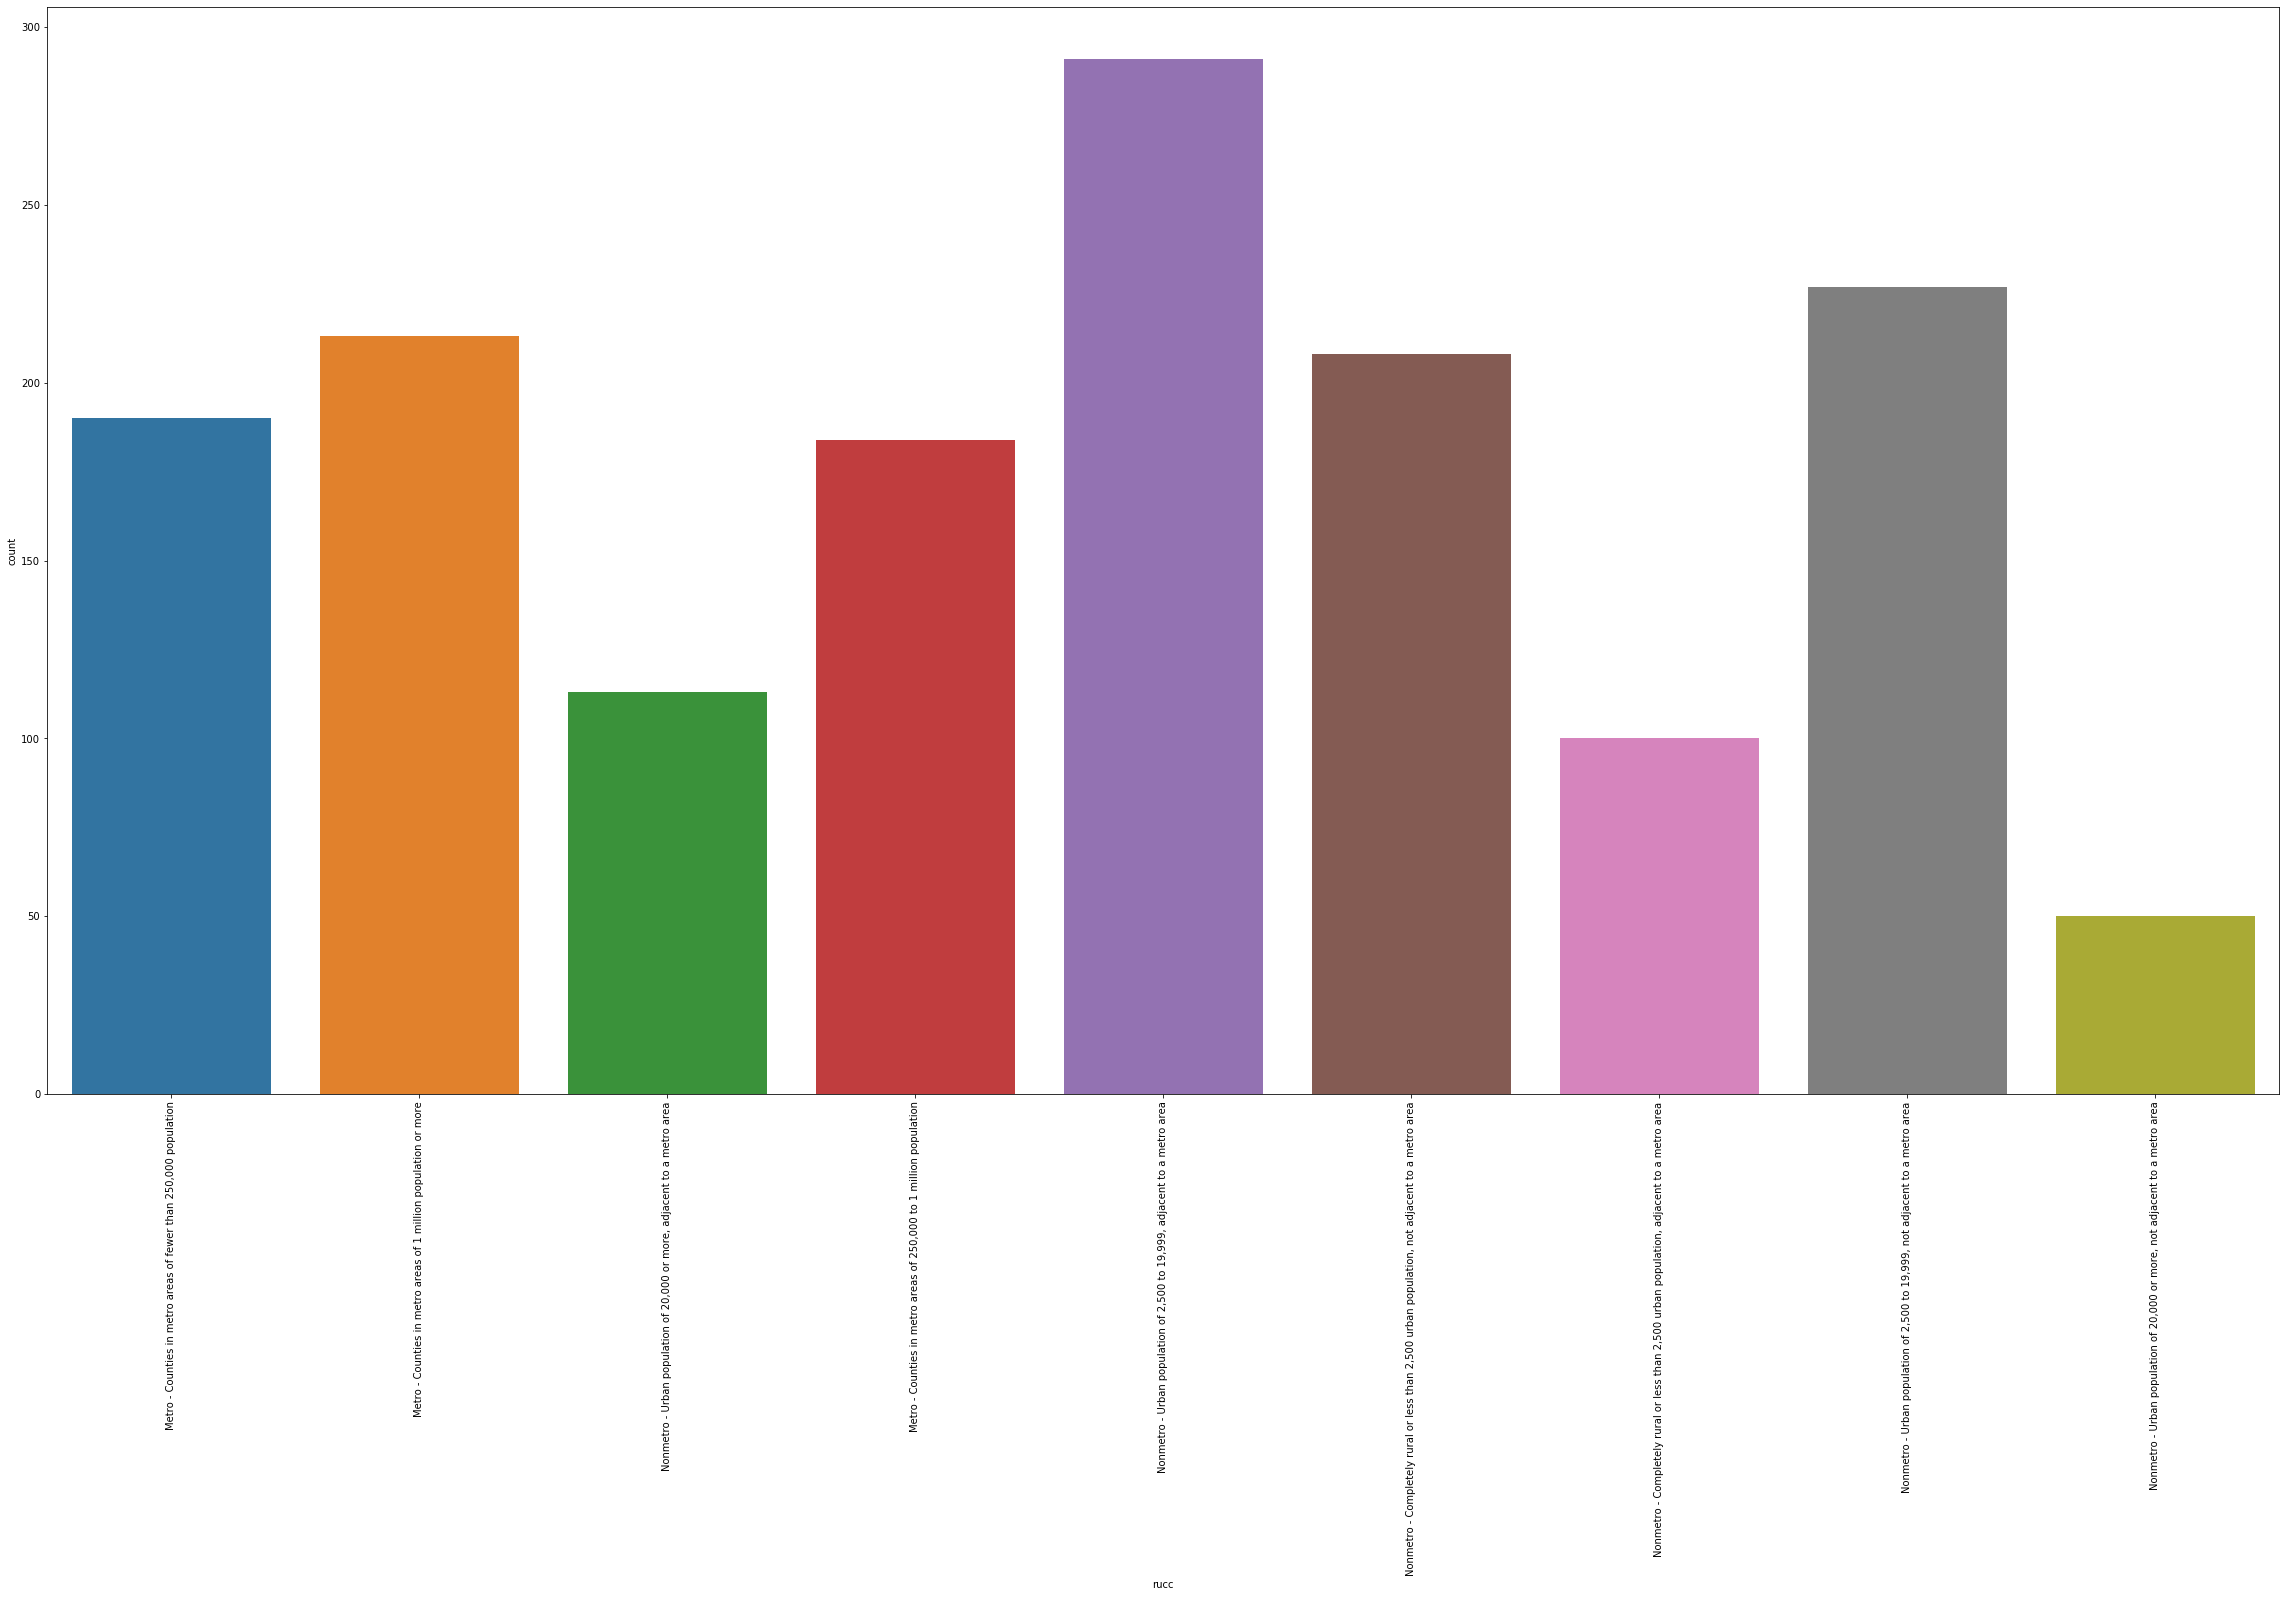

In [51]:
plt.figure(figsize=(40,20))
sns.countplot(x='rucc',data=df_cat)
plt.xticks(rotation=90)
plt.show()

In [52]:
df['urban_influence'].value_counts()

Small-in a metro area with fewer than 1 million residents                                             374
Large-in a metro area with at least 1 million residents or more                                       213
Noncore adjacent to a small metro with town of at least 2,500 residents                               165
Micropolitan not adjacent to a metro area                                                             138
Micropolitan adjacent to a small metro area                                                           129
Noncore adjacent to micro area and contains a town of 2,500-19,999 residents                           98
Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents     95
Noncore adjacent to micro area and does not contain a town of at least 2,500 residents                 92
Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents              74
Noncore adjacent to a large metro area        

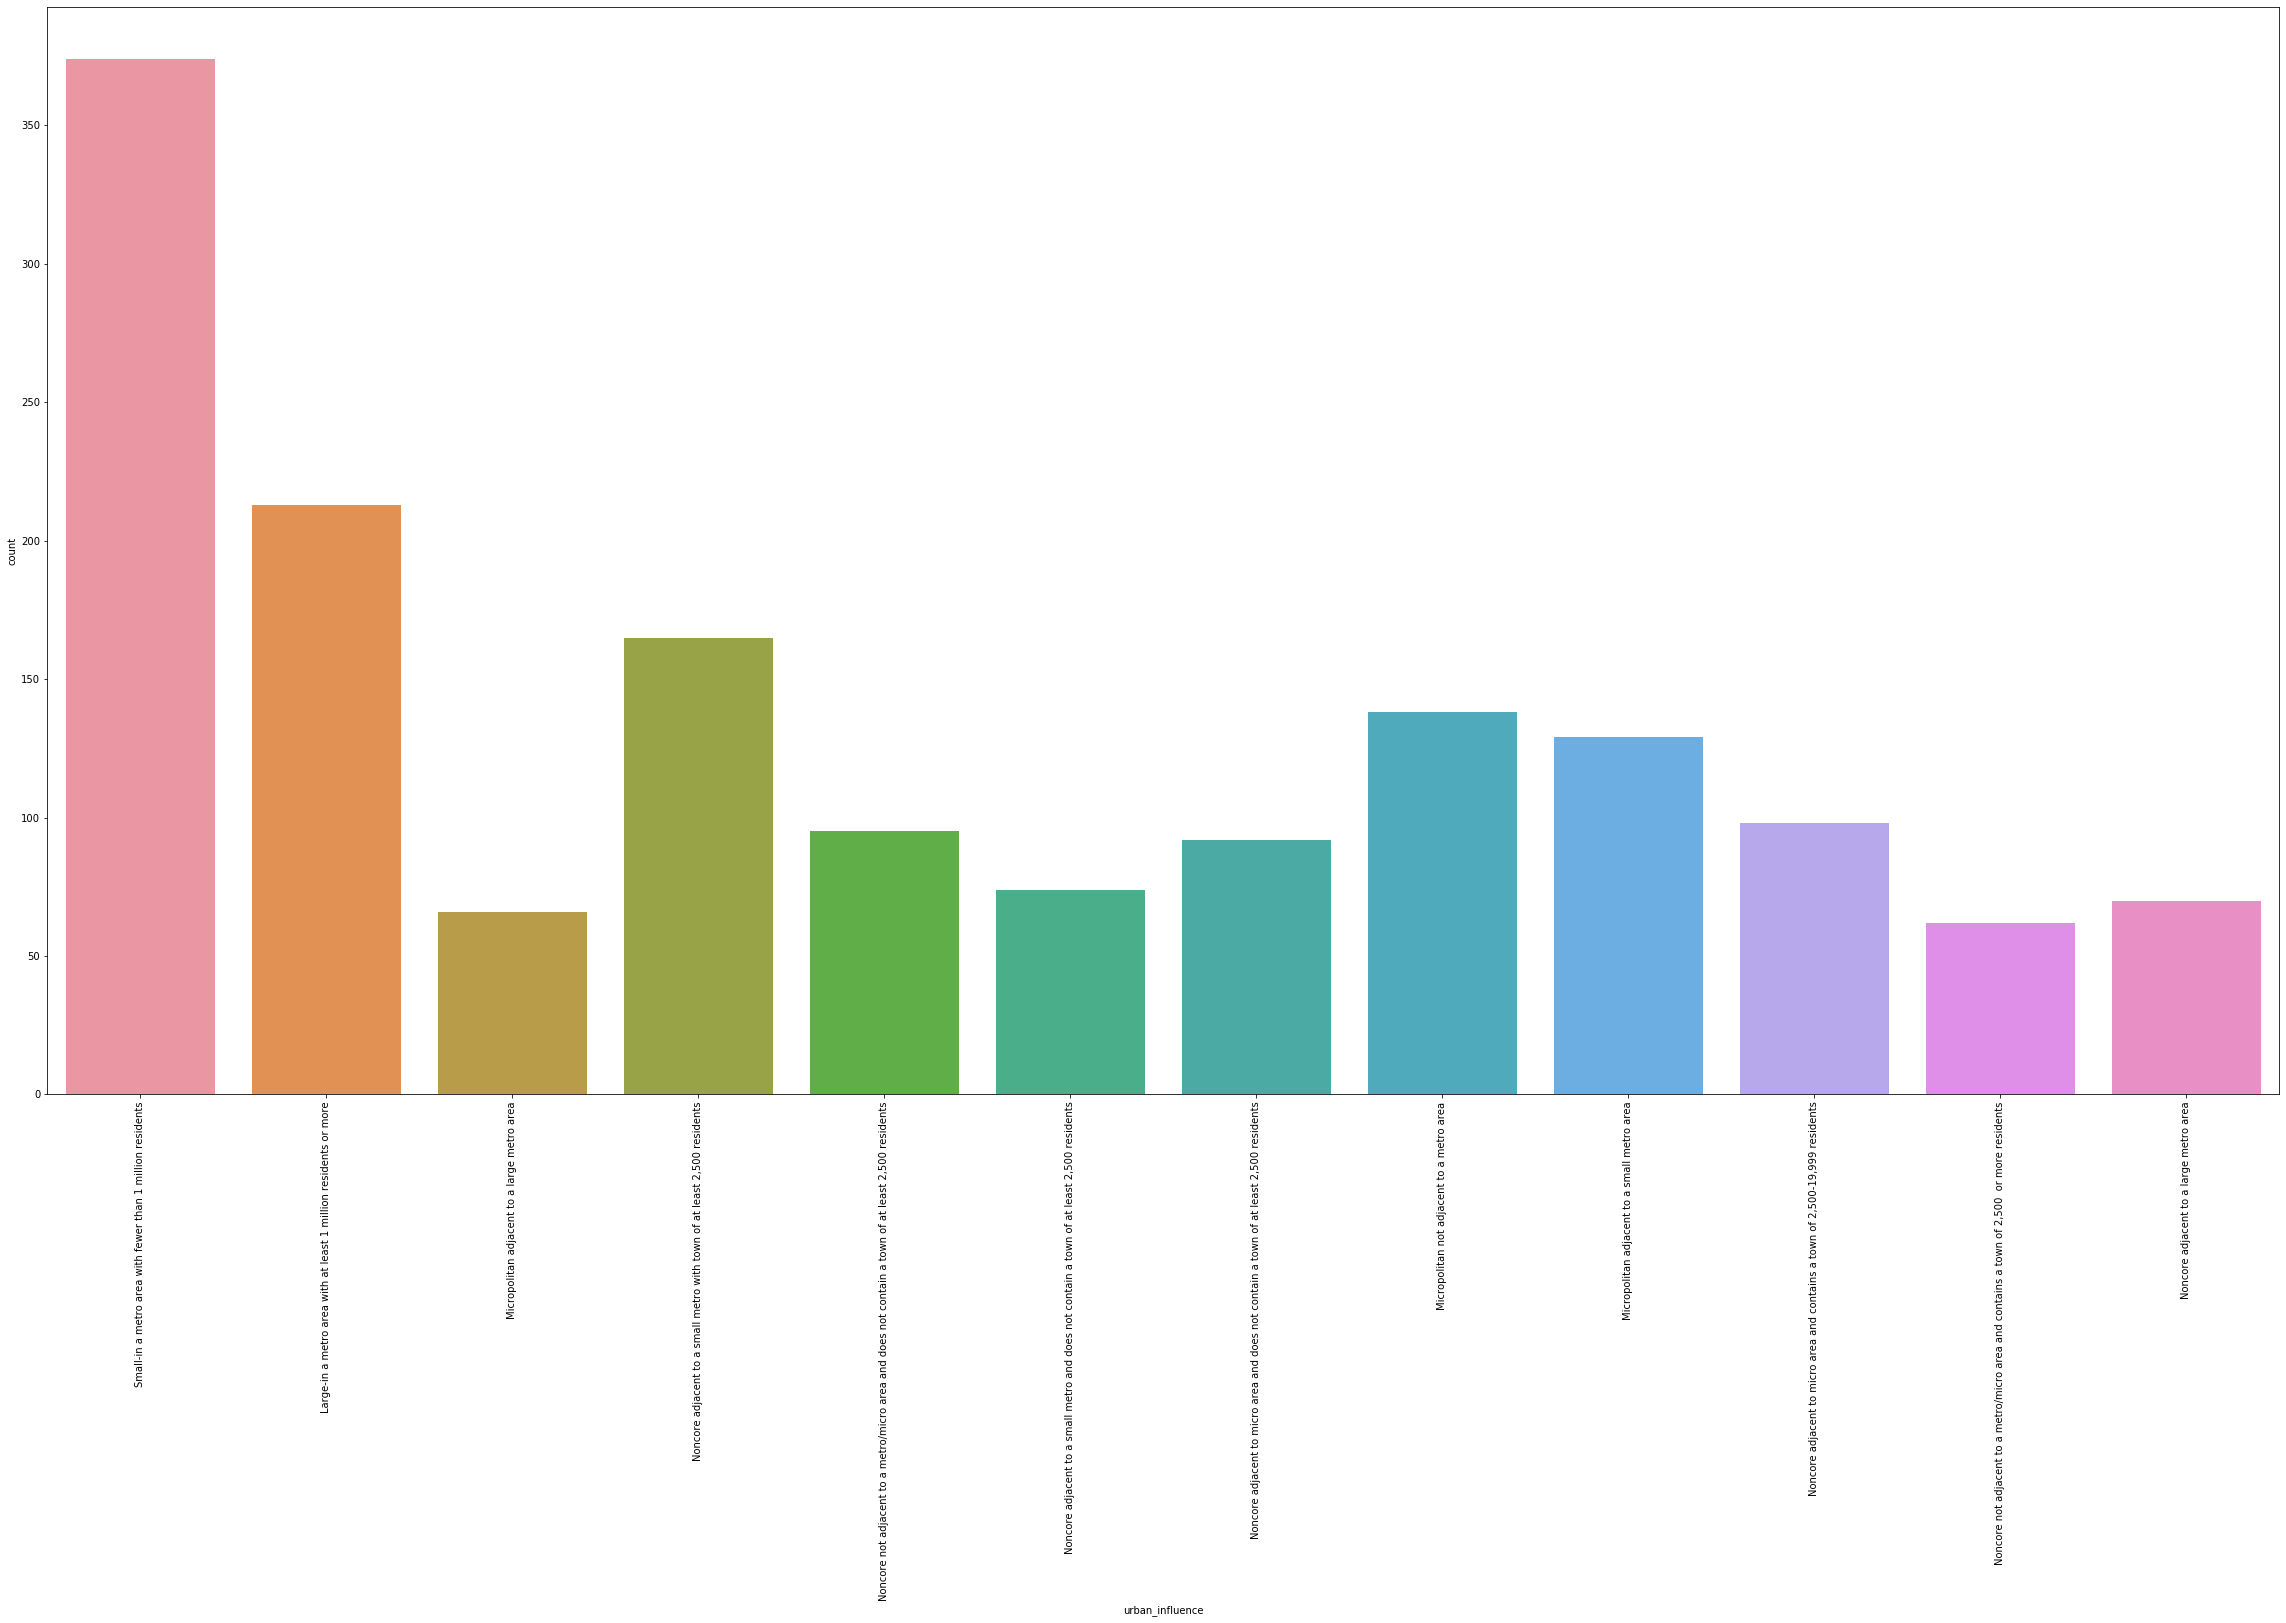

In [53]:
plt.figure(figsize=(40,20))
plt.xticks(rotation=90)
sns.countplot(x='urban_influence',data=df_cat)
plt.xticks(rotation=90)
plt.show()

In [54]:
df['economic_typology'].value_counts()

Nonspecialized                        603
Manufacturing-dependent               262
Farm-dependent                        227
Federal/State government-dependent    213
Recreation                            165
Mining-dependent                      106
Name: economic_typology, dtype: int64

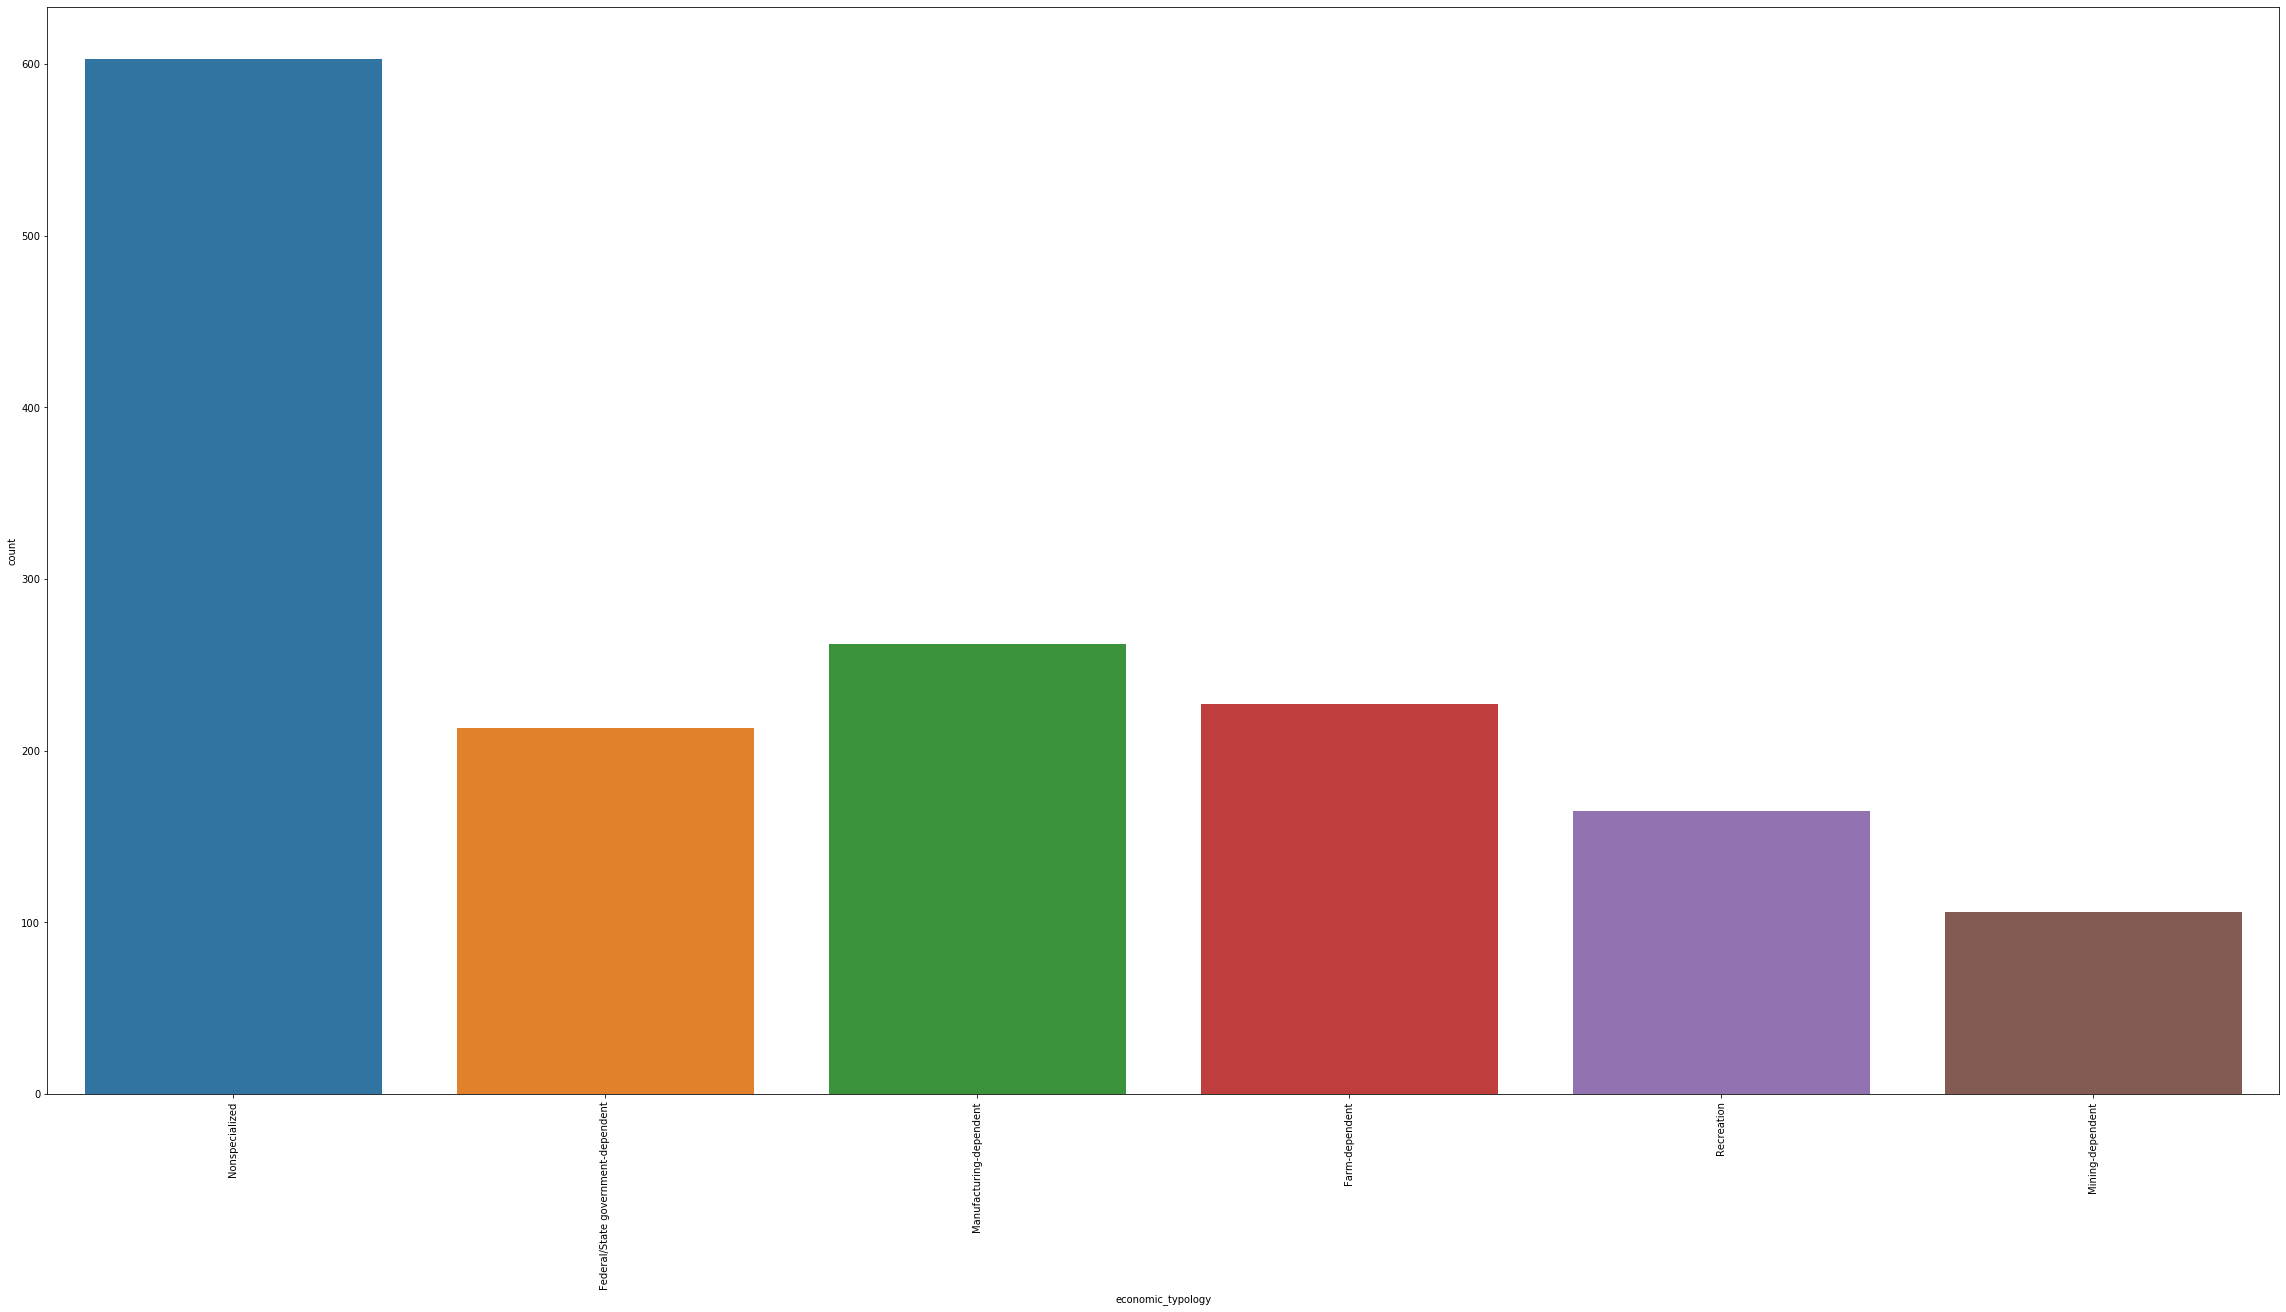

In [55]:
plt.figure(figsize=(40,20))
sns.countplot(x='economic_typology',data=df_cat)
plt.xticks(rotation=90)
plt.show()